<a href="https://colab.research.google.com/github/abhishekmali9191/Machine_Learning/blob/main/Practical_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11/11/2024

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

California Housing Dataset


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
rf = RandomForestRegressor(random_state=24)
params = {'max_features': [2,3,4,5,6]}
gcv = GridSearchCV(rf, params, cv=kfold, scoring='r2', verbose=3)
gcv.fit(X, y)
gcv.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....................max_features=2;, score=0.816 total time=   6.5s
[CV 2/5] END ....................max_features=2;, score=0.805 total time=   5.9s
[CV 3/5] END ....................max_features=2;, score=0.823 total time=   6.3s
[CV 4/5] END ....................max_features=2;, score=0.823 total time=   5.2s
[CV 5/5] END ....................max_features=2;, score=0.819 total time=   6.2s
[CV 1/5] END ....................max_features=3;, score=0.819 total time=   7.7s
[CV 2/5] END ....................max_features=3;, score=0.805 total time=  13.4s
[CV 3/5] END ....................max_features=3;, score=0.823 total time=   8.6s
[CV 4/5] END ....................max_features=3;, score=0.826 total time=  10.7s
[CV 5/5] END ....................max_features=3;, score=0.823 total time=   9.1s
[CV 1/5] END ....................max_features=4;, score=0.815 total time=  10.1s
[CV 2/5] END ....................max_features=4;,

{'max_features': 3}

In [ ]:
gcv.best_score_, gcv.best_estimator_

(0.8191165915665394, RandomForestRegressor(max_features=3, random_state=24))

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
rf = RandomForestRegressor(random_state=24)
params = {'max_features': [2,3,4,5,6],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2, 10, 50],
          'min_samples_leaf': [1, 10, 50],
          'n_estimators': [20, 50]}
gcv = GridSearchCV(rf, params, cv=kfold, scoring='r2', verbose=3)
gcv.fit(X, y)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.799 total time=   1.1s
[CV 2/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.785 total time=   1.1s
[CV 3/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.804 total time=   1.3s
[CV 4/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.805 total time=   1.5s
[CV 5/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.806 total time=   1.5s
[CV 1/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.813 total time=   2.7s
[CV 2/5] END max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.799 total time

KeyboardInterrupt: 

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
rf = RandomForestRegressor(random_state=24)
params = {'max_features': [2,3,4,5,6,],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2, 10, 50],
          'min_samples_leaf': [1, 10, 50],
          'n_estimators': [20, 50]}
rcv = RandomizedSearchCV(rf, params, cv=kfold, scoring='r2', verbose=3)
rcv.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.545 total time=   0.7s
[CV 2/5] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.518 total time=   0.7s
[CV 3/5] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.542 total time=   0.7s
[CV 4/5] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.539 total time=   0.7s
[CV 5/5] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.534 total time=   0.7s
[CV 1/5] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=50, n_estimators=20;, score=0.667 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=50, n_estimators=20;, score=0.639 total time=   0.4s
[CV 3/5]

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
                   estimator=RandomForestRegressor(random_state=24),
                   param_distributions={'max_depth': [None, 3, 5],
                                        'max_features': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 10, 50],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [20, 50]},
                   scoring='r2', verbose=3)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': None}
0.8002275362593988


**Breast Cancer Dataset**

In [ ]:
from os import X_OK
cancer = pd.read_csv('/content/BreastCancer.csv')
cancer.head()
X = cancer.drop('Class', axis=1)
y = cancer['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier(n_estimators=50,random_state=24)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714285714285714

In [ ]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=24)
ada = AdaBoostClassifier(estimator=dtc, n_estimators=50, random_state=24)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.9857142857142858

In [ ]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 24,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=3, random_state=24),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 24}

In [ ]:
# Using Grid Search CV
from sklearn.model_selection import GridSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
params = {'estimator__max_depth': [1,2,3],
          'n_estimators': [10, 50, 100]}
ada = AdaBoostClassifier(estimator=dtc, random_state=24)
gcv = GridSearchCV(ada, params, cv=kfold, scoring='accuracy', verbose=3)
gcv.fit(X_train, y_train)
print(gcv.best_params_)
print(gcv.best_score_)
print(gcv.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END estimator__max_depth=1, n_estimators=10;, score=0.964 total time=   0.1s
[CV 2/5] END estimator__max_depth=1, n_estimators=10;, score=0.973 total time=   0.1s
[CV 3/5] END estimator__max_depth=1, n_estimators=10;, score=0.955 total time=   0.1s
[CV 4/5] END estimator__max_depth=1, n_estimators=10;, score=0.929 total time=   0.1s
[CV 5/5] END estimator__max_depth=1, n_estimators=10;, score=0.955 total time=   0.1s
[CV 1/5] END estimator__max_depth=1, n_estimators=50;, score=0.955 total time=   0.4s
[CV 2/5] END estimator__max_depth=1, n_estimators=50;, score=0.982 total time=   0.6s
[CV 3/5] END estimator__max_depth=1, n_estimators=50;, score=0.938 total time=   0.5s
[CV 4/5] END estimator__max_depth=1, n_estimators=50;, score=0.938 total time=   0.3s
[CV 5/5] END estimator__max_depth=1, n_estimators=50;, score=0.973 total time=   0.3s
[CV 1/5] END estimator__max_depth=1, n_estimators=100;, score=0.964 total time= 

**Gradient Boosing**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
gbm = GradientBoostingClassifier(n_estimators=50, random_state=24)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714285714285714

In [ ]:
#Grid Search CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
params = {'max_depth': [1,2,3],
          'n_estimators': [10, 50, 100],
          'learning_rate':np.linspace(0.001,1,5)}
gbm = GradientBoostingClassifier(random_state=24)
gcv = GridSearchCV(gbm, params, cv=kfold, scoring='roc_auc', verbose=1)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
print(gcv.score(X_test, y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'learning_rate': 0.5005, 'max_depth': 3, 'n_estimators': 100}
0.9920157103691931
0.9999999999999999


# ***`xgboost` Boosting***

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
kyp = pd.read_csv('/content/Kyphosis.csv')
X = kyp.drop('Kyphosis', axis=1)
y = kyp['Kyphosis']
le = LabelEncoder()
y = le.fit_transform(y)
dict(zip(list(np.unique(y)), le.classes_))

{0: 'absent', 1: 'present'}

In [ ]:
#Grid Search CV
xgb = XGBClassifier(random_state=24)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
params = {'max_depth': [2,3,4],
          'n_estimators': [10, 50],
          'learning_rate':np.linspace(0.001,1,5)}
gbm = GradientBoostingClassifier(random_state=24)
gcv = GridSearchCV(xgb, params, cv=kfold, scoring='roc_auc', verbose=1)
gcv.fit(X,y)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=24, ...),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='roc_auc', verbose=1)

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 50},
 0.8439102564102565)

light GBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgm = LGBMClassifier(random_state=24)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],'max_depth':[2,3,4],'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(LGBMClassifier(random_state=24),param_grid=params,cv=kfold,scoring='accuracy')
gcv.fit(X,y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LGBMClassifier(random_state=24),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='accuracy')

In [ ]:
gcv = GridSearchCV(LGBMClassifier(random_state=24),param_grid=params,cv=kfold,scoring='accuracy')
gcv.fit(X,y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LGBMClassifier(random_state=24),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='accuracy')

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.75025, 'max_depth': 2, 'n_estimators': 50},
 0.8522058823529411)

`catboost`

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
lgm = CatBoostClassifier(random_state=24)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],'max_depth':[2,3,4],'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(CatBoostClassifier(random_state=24),param_grid=params,cv=kfold,scoring='accuracy')
gcv.fit(X,y)

0:	learn: 0.6927735	total: 46.5ms	remaining: 419ms
1:	learn: 0.6924644	total: 47.4ms	remaining: 190ms
2:	learn: 0.6920841	total: 47.5ms	remaining: 111ms
3:	learn: 0.6917292	total: 47.6ms	remaining: 71.4ms
4:	learn: 0.6914000	total: 47.7ms	remaining: 47.7ms
5:	learn: 0.6910233	total: 47.8ms	remaining: 31.9ms
6:	learn: 0.6908109	total: 47.9ms	remaining: 20.5ms
7:	learn: 0.6904947	total: 48ms	remaining: 12ms
8:	learn: 0.6901173	total: 48ms	remaining: 5.34ms
9:	learn: 0.6897489	total: 48.1ms	remaining: 0us
0:	learn: 0.6927820	total: 183us	remaining: 1.65ms
1:	learn: 0.6924805	total: 707us	remaining: 2.83ms
2:	learn: 0.6921705	total: 1.09ms	remaining: 2.56ms
3:	learn: 0.6918298	total: 1.66ms	remaining: 2.5ms
4:	learn: 0.6915142	total: 2.02ms	remaining: 2.02ms
5:	learn: 0.6911345	total: 2.41ms	remaining: 1.61ms
6:	learn: 0.6909227	total: 2.74ms	remaining: 1.17ms
7:	learn: 0.6906317	total: 3.11ms	remaining: 776us
8:	learn: 0.6902880	total: 3.43ms	remaining: 381us
9:	learn: 0.6899324	total: 3.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7fb924dbceb0>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='accuracy')

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.25075, 'max_depth': 2, 'n_estimators': 10}
0.8404411764705882


**Human Resource Analytics Dataset**

In [ ]:
hr = pd.read_csv('/content/HR_comma_sep.csv')
print(hr.head())
x = hr.drop('left', axis=1)
y = hr['left']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.10             0.77               6                   247   
3                0.92             0.85               5                   259   
4                0.89             1.00               5                   224   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   5              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [ ]:
cgbm = CatBoostClassifier(random_state=24, cat_features=['Department', 'salary'], num_boost_round=50)
cgbm.fit(x_train, y_train)
y_pred = cgbm.predict(x_test)

Learning rate set to 0.464223
0:	learn: 0.4007756	total: 5.47ms	remaining: 268ms
1:	learn: 0.2764045	total: 10.9ms	remaining: 261ms
2:	learn: 0.2072502	total: 16.2ms	remaining: 255ms
3:	learn: 0.1703559	total: 21.3ms	remaining: 245ms
4:	learn: 0.1504125	total: 26.9ms	remaining: 242ms
5:	learn: 0.1385032	total: 32.1ms	remaining: 235ms
6:	learn: 0.1262534	total: 37.8ms	remaining: 232ms
7:	learn: 0.1192993	total: 43.1ms	remaining: 226ms
8:	learn: 0.1138466	total: 48.3ms	remaining: 220ms
9:	learn: 0.1082583	total: 53.5ms	remaining: 214ms
10:	learn: 0.1043098	total: 58.6ms	remaining: 208ms
11:	learn: 0.1013743	total: 63.7ms	remaining: 202ms
12:	learn: 0.0990883	total: 68.8ms	remaining: 196ms
13:	learn: 0.0969591	total: 74.2ms	remaining: 191ms
14:	learn: 0.0944803	total: 79.4ms	remaining: 185ms
15:	learn: 0.0923386	total: 84.8ms	remaining: 180ms
16:	learn: 0.0915497	total: 90ms	remaining: 175ms
17:	learn: 0.0903382	total: 95.2ms	remaining: 169ms
18:	learn: 0.0881423	total: 100ms	remaining: 1

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9793264421473825


**using gcv**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
hr = pd.read_csv('/content/HR_comma_sep.csv')
print(hr.head())
X = hr.drop('left', axis=1)
y = hr['left']
X.info()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.10             0.77               6                   247   
3                0.92             0.85               5                   259   
4                0.89             1.00               5                   224   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   5              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [ ]:
# ohe = OneHotEncoder(handle_unknown='ignore')
# X = ohe.fit_transform(X[['Department', 'salary']])

In [ ]:
cgbm = CatBoostClassifier(random_state=24, cat_features=['Department', 'salary'])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],
          'max_depth':[2,3,4],
          'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(cgbm, param_grid=params, cv=kfold, scoring='roc_auc', verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.6925472	total: 9.69ms	remaining: 87.2ms
1:	learn: 0.6919348	total: 16.4ms	remaining: 65.8ms
2:	learn: 0.6913254	total: 24.7ms	remaining: 57.5ms
3:	learn: 0.6907172	total: 31.9ms	remaining: 47.8ms
4:	learn: 0.6901085	total: 39.9ms	remaining: 39.9ms
5:	learn: 0.6895010	total: 47.9ms	remaining: 31.9ms
6:	learn: 0.6888947	total: 57.5ms	remaining: 24.6ms
7:	learn: 0.6882913	total: 65ms	remaining: 16.3ms
8:	learn: 0.6876875	total: 71.6ms	remaining: 7.95ms
9:	learn: 0.6870981	total: 79.6ms	remaining: 0us
0:	learn: 0.6925453	total: 6.39ms	remaining: 57.5ms
1:	learn: 0.6919295	total: 15.8ms	remaining: 63.2ms
2:	learn: 0.6913171	total: 18.6ms	remaining: 43.4ms
3:	learn: 0.6907059	total: 22.4ms	remaining: 33.7ms
4:	learn: 0.6900937	total: 25.9ms	remaining: 25.9ms
5:	learn: 0.6894828	total: 28.6ms	remaining: 19.1ms
6:	learn: 0.6888731	total: 32.7ms	remaining: 14ms
7:	learn: 0.6882667	total: 40ms	remaining: 10ms
8:	learn: 0.6

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7fb924b3d480>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='roc_auc', verbose=1)

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 50},
 0.9893002633546979)

***Medical care expenses dataset***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
insurance = pd.read_csv('/content/insurance.csv')
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
cgbm = CatBoostRegressor(random_state=24, cat_features=['sex', 'smoker', 'region'])
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],
          'max_depth':[2,3,4],
          'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(cgbm, param_grid=params, cv=kfold, scoring='r2', verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 12036.2666510	total: 640us	remaining: 5.76ms
1:	learn: 12027.5885074	total: 1.68ms	remaining: 6.74ms
2:	learn: 12018.7579696	total: 2.4ms	remaining: 5.61ms
3:	learn: 12010.0080421	total: 3.1ms	remaining: 4.65ms
4:	learn: 12001.6612206	total: 3.77ms	remaining: 3.77ms
5:	learn: 11992.8131380	total: 4.45ms	remaining: 2.97ms
6:	learn: 11984.5229977	total: 5.09ms	remaining: 2.18ms
7:	learn: 11975.9771850	total: 5.75ms	remaining: 1.44ms
8:	learn: 11967.4506001	total: 6.4ms	remaining: 711us
9:	learn: 11958.6367854	total: 7.06ms	remaining: 0us
0:	learn: 12050.3139519	total: 582us	remaining: 5.24ms
1:	learn: 12041.5605243	total: 1.44ms	remaining: 5.77ms
2:	learn: 12032.6556923	total: 2.17ms	remaining: 5.05ms
3:	learn: 12023.9006792	total: 2.82ms	remaining: 4.24ms
4:	learn: 12015.5102852	total: 3.56ms	remaining: 3.56ms
5:	learn: 12006.6672992	total: 4.08ms	remaining: 2.72ms
6:	learn: 11997.9485758	total: 4.65ms	remaining: 1.

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb924fee2f0>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='r2', verbose=1)

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.5005, 'max_depth': 2, 'n_estimators': 50},
 0.8584148378430502)

In [ ]:
best_model = gcv.best_estimator_
tst = pd.read_csv('/content/tst_insure.csv')
y_pred = best_model.predict(tst)

array([17966.36211017,  3307.19279412,  6599.20481335,  4453.98522086,
        7587.52024297, 10640.23311394,  2712.24455919,  3153.13728396,
       40276.73061453, 10903.62348632,  4235.82707178, 17966.36211017,
       12588.41590807, 18270.24774036,  7723.9955751 , 14465.70395615,
       13830.67099526, 14202.83015253,  2656.09130451,  3419.86881654,
        3153.13728396,  2630.44248975,  2656.09130451, 13530.71053118,
        3167.52166669,  6394.1783497 ,  4819.84901633, 20372.65230217,
        6694.58113044, 21900.15985462,  8033.048928  , 40282.29218929,
       12086.95913051, 13210.38974776,  3722.84146736,  5697.18163761,
        8449.07556521,  7938.29074195, 21893.00810089,  8485.40618169,
        8567.85710999, 22246.2599627 , 16189.14780405, 38642.03712358,
       12502.65623102, 21490.6964117 , 35389.37561944, 12352.19321362,
        7094.8159051 ,  5720.3291551 , 11322.72638608,  7129.85036931,
        6999.43958801,  9854.33337224, 14805.49693135,  3057.76096687,
      

***Productivity Prediction of Garment Employees***

**Using XGBoostRegressor**

In [ ]:
!pip install ucimlrepo
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X.drop(['wip', 'date'], axis=1, inplace=True)
X.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 112.3+ KB


In [ ]:
X.head(10)

quarter department       day  team  targeted_productivity    smv  \
0  Quarter1     sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing  Thursday     1                   0.75   3.94   
2  Quarter1     sweing  Thursday    11                   0.80  11.41   
3  Quarter1     sweing  Thursday    12                   0.80  11.41   
4  Quarter1     sweing  Thursday     6                   0.80  25.90   
5  Quarter1     sweing  Thursday     7                   0.80  25.90   
6  Quarter1  finishing  Thursday     2                   0.75   3.94   
7  Quarter1     sweing  Thursday     3                   0.75  28.08   
8  Quarter1     sweing  Thursday     2                   0.75  19.87   
9  Quarter1     sweing  Thursday     1                   0.75  28.08   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   
5       6720         38        0.0         0                   0   
6        960          0        0.0         0                   0   
7       6900         45        0.0         0                   0   
8       6000         34        0.0         0                   0   
9       6900         45        0.0         0                   0   

   no_of_workers  
0           59.0  
1            8.0  
2           30.5  
3           30.5  
4           56.0  
5           56.0  
6            8.0  
7           57.5  
8           55.0  
9           57.5

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actual_productivity  1197 non-null   float64
dtypes: float64(1)
memory usage: 9.5 KB


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
trf = make_column_transformer((ohe, ['quarter', 'department', 'day']), remainder='passthrough',
                              verbose_feature_names_out=False)

X = trf.fit_transform(X)

In [ ]:
#Grid Search CV
xgb = XGBRegressor(random_state=24, )
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
params = {'max_depth': [2,3,4],
          'n_estimators': [10, 50],
          'learning_rate':np.linspace(0.001,1,5)}

gcv = GridSearchCV(xgb, params, cv=kfold, scoring='r2', verbose=1)
gcv.fit(X,y)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=24, ...),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='r2', verbose=1)

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.25075, 'max_depth': 4, 'n_estimators': 50},
 0.49421619176864623)

**using catBoostRegressor**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X.drop(['wip', 'date'], axis=1, inplace=True)
X.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [ ]:
cgbm = CatBoostRegressor(random_state=24, cat_features=['quarter', 'department', 'day'])
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],
          'max_depth':[2,3,4],
          'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(cgbm, param_grid=params, cv=kfold, scoring='r2', verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.1734871	total: 4.32ms	remaining: 38.9ms
1:	learn: 0.1734590	total: 5.4ms	remaining: 21.6ms
2:	learn: 0.1734258	total: 8.51ms	remaining: 19.9ms
3:	learn: 0.1734025	total: 9.49ms	remaining: 14.2ms
4:	learn: 0.1733755	total: 10.6ms	remaining: 10.6ms
5:	learn: 0.1733437	total: 11.7ms	remaining: 7.77ms
6:	learn: 0.1733106	total: 12.6ms	remaining: 5.4ms
7:	learn: 0.1732774	total: 13.7ms	remaining: 3.43ms
8:	learn: 0.1732519	total: 14.8ms	remaining: 1.64ms
9:	learn: 0.1732184	total: 15.8ms	remaining: 0us
0:	learn: 0.1743372	total: 1.72ms	remaining: 15.5ms
1:	learn: 0.1743041	total: 2.63ms	remaining: 10.5ms
2:	learn: 0.1742674	total: 4.66ms	remaining: 10.9ms
3:	learn: 0.1742350	total: 5.68ms	remaining: 8.52ms
4:	learn: 0.1742022	total: 6.6ms	remaining: 6.6ms
5:	learn: 0.1741651	total: 7.83ms	remaining: 5.22ms
6:	learn: 0.1741270	total: 11.7ms	remaining: 5.03ms
7:	learn: 0.1740911	total: 12.9ms	remaining: 3.24ms
8:	learn:

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb90493a200>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='r2', verbose=1)

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.5005, 'max_depth': 4, 'n_estimators': 50},
 0.49768646968713837)

**using Lightgbm**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from xgboost import XGBRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X.drop(['wip', 'date'], axis=1, inplace=True)
X.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
trf = make_column_transformer((ohe, ['quarter', 'department', 'day']), remainder='passthrough',
                              verbose_feature_names_out=False)

X = trf.fit_transform(X)

In [ ]:
lgm = LGBMRegressor(random_state=24)
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],'max_depth':[2,3,4],'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(lgm,param_grid=params,cv=kfold,scoring='r2')
gcv.fit(X,y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 20
[LightGBM] [Info] Start training from score 0.735678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LGBMRegressor(random_state=24),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='r2')

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.25075, 'max_depth': 4, 'n_estimators': 50},
 0.49776817407312857)

**catboost with OneHotEncoding**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X.drop(['wip', 'date'], axis=1, inplace=True)
X.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
trf = make_column_transformer((ohe, ['quarter', 'department', 'day']), remainder='passthrough',
                              verbose_feature_names_out=False)

X = trf.fit_transform(X)

In [ ]:
cgbm = CatBoostRegressor(random_state=24)
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
params = {'n_estimators': [10,50],
          'max_depth':[2,3,4],
          'learning_rate':np.linspace(0.001,1,5)}
gcv = GridSearchCV(cgbm, param_grid=params, cv=kfold, scoring='r2', verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.1734899	total: 468us	remaining: 4.22ms
1:	learn: 0.1734589	total: 6.49ms	remaining: 25.9ms
2:	learn: 0.1734298	total: 7.27ms	remaining: 17ms
3:	learn: 0.1733994	total: 7.9ms	remaining: 11.9ms
4:	learn: 0.1733690	total: 8.26ms	remaining: 8.26ms
5:	learn: 0.1733468	total: 8.62ms	remaining: 5.75ms
6:	learn: 0.1733134	total: 8.96ms	remaining: 3.84ms
7:	learn: 0.1732813	total: 9.29ms	remaining: 2.32ms
8:	learn: 0.1732603	total: 13.6ms	remaining: 1.5ms
9:	learn: 0.1732269	total: 17.4ms	remaining: 0us
0:	learn: 0.1743398	total: 451us	remaining: 4.06ms
1:	learn: 0.1743015	total: 1.25ms	remaining: 5.02ms
2:	learn: 0.1742623	total: 1.62ms	remaining: 3.78ms
3:	learn: 0.1742291	total: 1.96ms	remaining: 2.94ms
4:	learn: 0.1741910	total: 2.31ms	remaining: 2.31ms
5:	learn: 0.1741639	total: 2.65ms	remaining: 1.76ms
6:	learn: 0.1741247	total: 2.98ms	remaining: 1.28ms
7:	learn: 0.1740863	total: 3.28ms	remaining: 819us
8:	learn: 0.

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb9049c90c0>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='r2', verbose=1)

In [ ]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.25075, 'max_depth': 4, 'n_estimators': 50},
 0.49746914991245583)

# 12/11/2024

**Stack Emsembling**

Cancer Prognostic Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from xgboost import XGBRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
cancer = pd.read_csv('/content/BreastCancer.csv', index_col=0)
X = cancer.drop('Class', axis=1)
y = cancer['Class']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [ ]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=24)
nb = GaussianNB()
svm = SVC(probability=True, random_state=24)
lr = LogisticRegression(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=lr)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714285714285714

In [ ]:
y_pred_prob = stack.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9910426731078905


**using passthrough=True  option**

In [ ]:
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=lr, passthrough=True)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714285714285714

In [ ]:
y_pred_prob = stack.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9959742351046699


**Glass Identification Datset**

In [ ]:
glass = pd.read_csv('/content/Glass.csv')
X = glass.drop('Type', axis=1)
y = glass['Type']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [ ]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=24)
nb = GaussianNB()
svm = SVC(probability=True, random_state=24)
lr = LogisticRegression(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=lr)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.7230769230769231

In [ ]:
y_pred_prob = stack.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

0.7261085625838872


In [ ]:
#Using passthrough = True
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=24)
nb = GaussianNB()
svm = SVC(probability=True, random_state=24)
lr = LogisticRegression(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=lr, passthrough=True)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.7076923076923077

In [ ]:
y_pred_prob = stack.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

0.774778470663623


In [ ]:
#Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=rfc)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.6615384615384615

In [ ]:
y_pred_prob = stack.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

1.281034550172938


In [ ]:
#Using passthrough
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=rfc, passthrough = True)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.9093733816675298

In [ ]:
y_pred_prob = stack.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

1.23629666948903


**Using Grid SearchCV**

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
rfc = RandomForestClassifier(random_state=24)
params = {'final_estimator__max_depth':[3,4,5],'SVM__C':np.linspace(0.001,3,5),
          'TREE__max_depth':[None, 2, 3],
          'final_estimator__n_estimators':[10,50],
          'passthrough':[True, False]}
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=rfc)
gcv = GridSearchCV(stack, param_grid=params, cv=kfold, scoring='neg_log_loss', verbose = 3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END SVM__C=0.001, TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10, passthrough=True;, score=-0.906 total time=   0.2s
[CV 2/5] END SVM__C=0.001, TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10, passthrough=True;, score=-0.719 total time=   0.2s
[CV 3/5] END SVM__C=0.001, TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10, passthrough=True;, score=-1.044 total time=   0.2s
[CV 4/5] END SVM__C=0.001, TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10, passthrough=True;, score=-0.918 total time=   0.2s
[CV 5/5] END SVM__C=0.001, TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10, passthrough=True;, score=-1.035 total time=   0.2s
[CV 1/5] END SVM__C=0.001, TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10, pass

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=StackingClassifier(estimators=[('KNN',
                                                       KNeighborsClassifier()),
                                                      ('TREE',
                                                       DecisionTreeClassifier(random_state=24)),
                                                      ('NB', GaussianNB()),
                                                      ('SVM',
                                                       SVC(probability=True,
                                                           random_state=24))],
                                          final_estimator=RandomForestClassifier(random_state=24)),
             param_grid={'SVM__C': array([1.00000e-03, 7.50750e-01, 1.50050e+00, 2.25025e+00, 3.00000e+00]),
                         'TREE__max_depth': [None, 2, 3],
                         'final_estimator__max_depth': [3, 4, 5],
                         'final_estimator__n_estimators': [10, 50],
                         'passthrough': [True, False]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

{'SVM__C': 3.0, 'TREE__max_depth': None, 'final_estimator__max_depth': 5, 'final_estimator__n_estimators': 50, 'passthrough': True}
-0.7527872785860131


# **Serializing the Fitted Object**

In [ ]:
import pickle
pkfile = open("stack_gls.pkl",'wb')
pickle.dump(gcv, pkfile)
pkfile.close()

**Loading File**

In [ ]:
#Loading the file
infile = open("/content/stack_gls.pkl",'rb')
objload = pickle.load(infile)
infile.close()

In [ ]:
objload

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=StackingClassifier(estimators=[('KNN',
                                                       KNeighborsClassifier()),
                                                      ('TREE',
                                                       DecisionTreeClassifier(random_state=24)),
                                                      ('NB', GaussianNB()),
                                                      ('SVM',
                                                       SVC(probability=True,
                                                           random_state=24))],
                                          final_estimator=RandomForestClassifier(random_state=24)),
             param_grid={'SVM__C': array([1.00000e-03, 7.50750e-01, 1.50050e+00, 2.25025e+00, 3.00000e+00]),
                         'TREE__max_depth': [None, 2, 3],
                         'final_estimator__max_depth': [3, 4, 5],
                         'final_estimator__n_estimators': [10, 50],
                         'passthrough': [True, False]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
tst_glass = pd.read_csv('tst_Glass.csv')
objload.predict(tst_glass)

array(['headlamps', 'building_windows_float_processed',
       'building_windows_non_float_processed', 'headlamps',
       'building_windows_non_float_processed', 'headlamps'], dtype=object)

In [ ]:
tst_glass['pred_type']=objload.predict(tst_glass)
tst_glass.to_csv('tst_glass_pred.csv', index=False)

# **Satellite DataSet**

In [ ]:
satelite = pd.read_csv('/content/Satellite.csv', sep=';')
satelite.head()

x.1  x.2  x.3  x.4  x.5  x.6  x.7  x.8  x.9  x.10  ...  x.28  x.29  x.30  \
0   92  115  120   94   84  102  106   79   84   102  ...   104    88   121   
1   84  102  106   79   84  102  102   83   80   102  ...   100    84   107   
2   84  102  102   83   80  102  102   79   84    94  ...    87    84    99   
3   80  102  102   79   84   94  102   79   80    94  ...    79    84    99   
4   84   94  102   79   80   94   98   76   80   102  ...    79    84   103   

   x.31  x.32  x.33  x.34  x.35  x.36    classes  
0   128   100    84   107   113    87  grey soil  
1   113    87    84    99   104    79  grey soil  
2   104    79    84    99   104    79  grey soil  
3   104    79    84   103   104    79  grey soil  
4   104    79    79   107   109    87  grey soil  

[5 rows x 37 columns]

In [ ]:
X = satelite.drop('classes', axis=1)
y = satelite['classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [ ]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=24)
nb = GaussianNB()
rfc = RandomForestClassifier(random_state=24)
svm = SVC(probability=True, random_state=24)
lr = LogisticRegression(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=lr)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.905748316934231

In [ ]:
y_pred_prob = stack.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

0.2709870109450148


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=24)
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=rfc, passthrough = True)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy_score(y_test, y_pred)

0.9093733816675298

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
rfc = RandomForestClassifier(random_state=24)
params = {'final_estimator__max_depth':[3,4,5],
          'TREE__max_depth':[None, 2],
          'final_estimator__n_estimators':[10,50]}
stack = StackingClassifier(estimators=[('KNN', knn), ('TREE', dtc),('NB', nb),  ('SVM', svm)], final_estimator=rfc)
gcv = GridSearchCV(stack, param_grid=params, cv=kfold, scoring='neg_log_loss', verbose = 3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10;, score=-0.542 total time=   5.9s
[CV 2/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10;, score=-0.576 total time=   4.8s
[CV 3/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10;, score=-0.570 total time=   6.5s
[CV 4/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10;, score=-0.559 total time=   4.9s
[CV 5/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=10;, score=-0.570 total time=   5.4s
[CV 1/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=50;, score=-0.526 total time=   5.9s
[CV 2/5] END TREE__max_depth=None, final_estimator__max_depth=3, final_estimator__n_estimators=50;, score=-0.561 total time=   4.9s
[CV 3/5] END TR

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=StackingClassifier(estimators=[('KNN',
                                                       KNeighborsClassifier()),
                                                      ('TREE',
                                                       DecisionTreeClassifier(random_state=24)),
                                                      ('NB', GaussianNB()),
                                                      ('SVM',
                                                       SVC(probability=True,
                                                           random_state=24))],
                                          final_estimator=RandomForestClassifier(random_state=24)),
             param_grid={'TREE__max_depth': [None, 2],
                         'final_estimator__max_depth': [3, 4, 5],
                         'final_estimator__n_estimators': [10, 50]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

# **13/11/2024**

***Time Series***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
passengers = pd.read_csv('AirPassengers.csv')
passengers.sample(10)

Month  Passengers
11   1949-12         118
137  1960-06         535
4    1949-05         121
104  1957-09         404
78   1955-07         364
75   1955-04         269
72   1955-01         242
38   1952-03         193
33   1951-10         162
64   1954-05         234

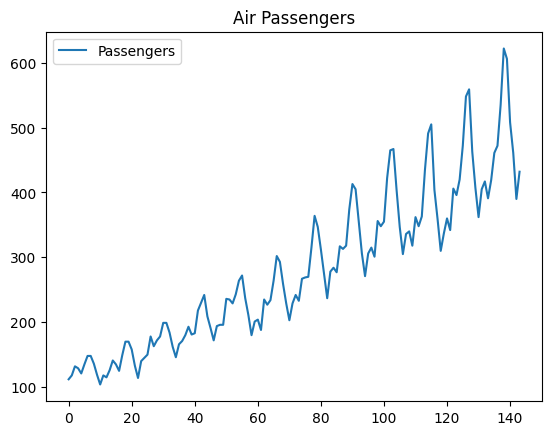

In [ ]:
passengers.plot()
plt.title('Air Passengers')
plt.show()

In [ ]:
passengers = pd.read_csv('AirPassengers.csv', index_col=0)
print(type(passengers.index))

<class 'pandas.core.indexes.base.Index'>


In [ ]:
passengers.index = pd.to_datetime(passengers.index).to_period('M')
type(passengers.index)

pandas.core.indexes.period.PeriodIndex

<ipython-input-22-9925c7cbaa5a>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  m_pass = passengers.resample('Q').sum()


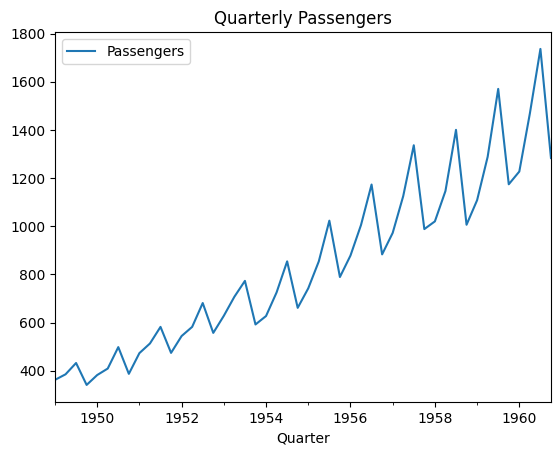

In [ ]:
m_pass = passengers.resample('Q').sum()
m_pass.index.rename('Quarter', inplace =True)
m_pass.plot()
plt.title('Quarterly Passengers')
plt.show()

<ipython-input-23-7f5089947a28>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  y_pass = passengers.resample('Y').sum()


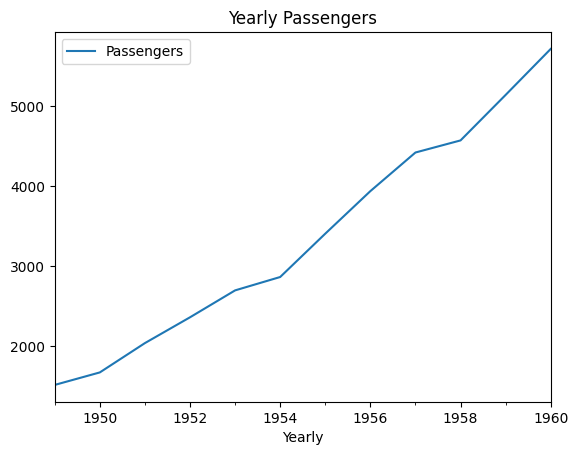

In [ ]:
y_pass = passengers.resample('Y').sum()
y_pass.index.rename('Yearly', inplace =True)
y_pass.plot()
plt.title('Yearly Passengers')
plt.show()

***Decompoition***

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

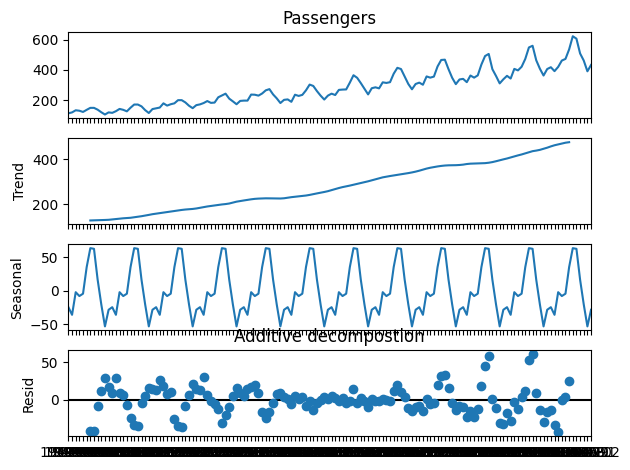

In [ ]:
passengers = pd.read_csv('AirPassengers.csv', index_col=0)
result = seasonal_decompose(passengers['Passengers'], model='additive', period = 12)
result.plot()
plt.title('Additive decompostion')
plt.show()

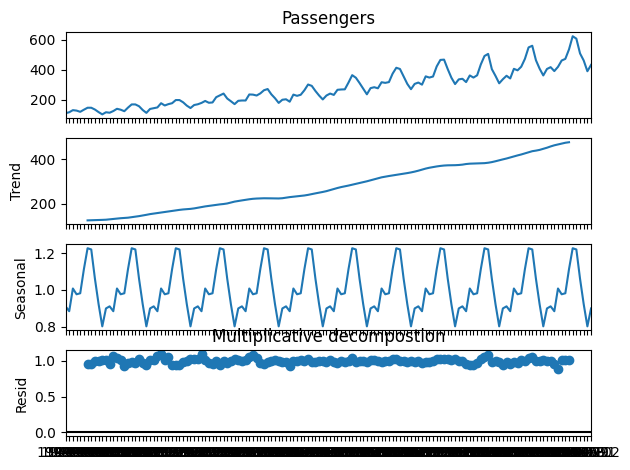

In [ ]:
#Using Multiplicative Techniques
result = seasonal_decompose(passengers['Passengers'], model='multiplicative', period =12)
result.plot()
plt.title('Multiplicative decompostion')
plt.show()

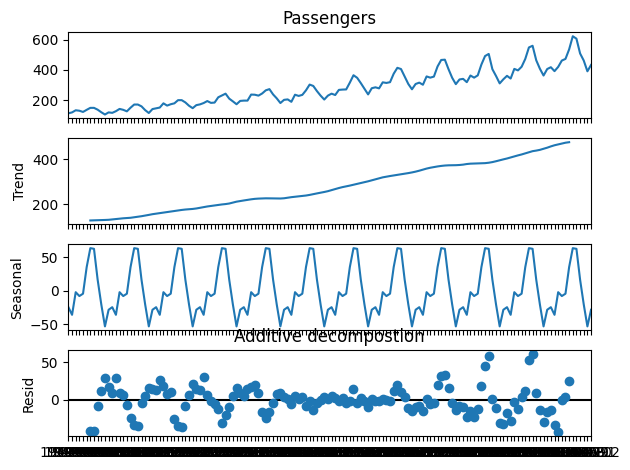

In [ ]:
passengers = pd.read_csv('AirPassengers.csv', index_col=0)
result = seasonal_decompose(passengers['Passengers'], model='additive', period = 12)
result.plot()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Additive decompostion')
plt.show()

Centered Moving Average

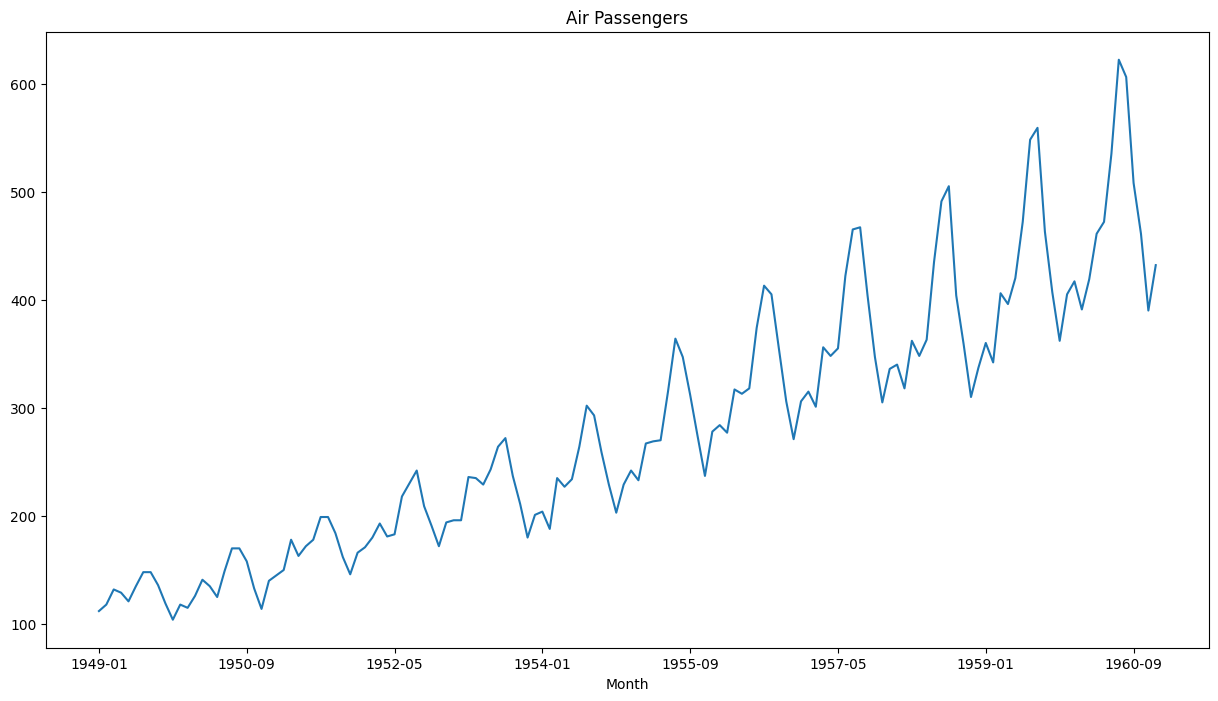

In [ ]:
y = passengers['Passengers']
y.plot()
plt.title('Air Passengers')
plt.show()

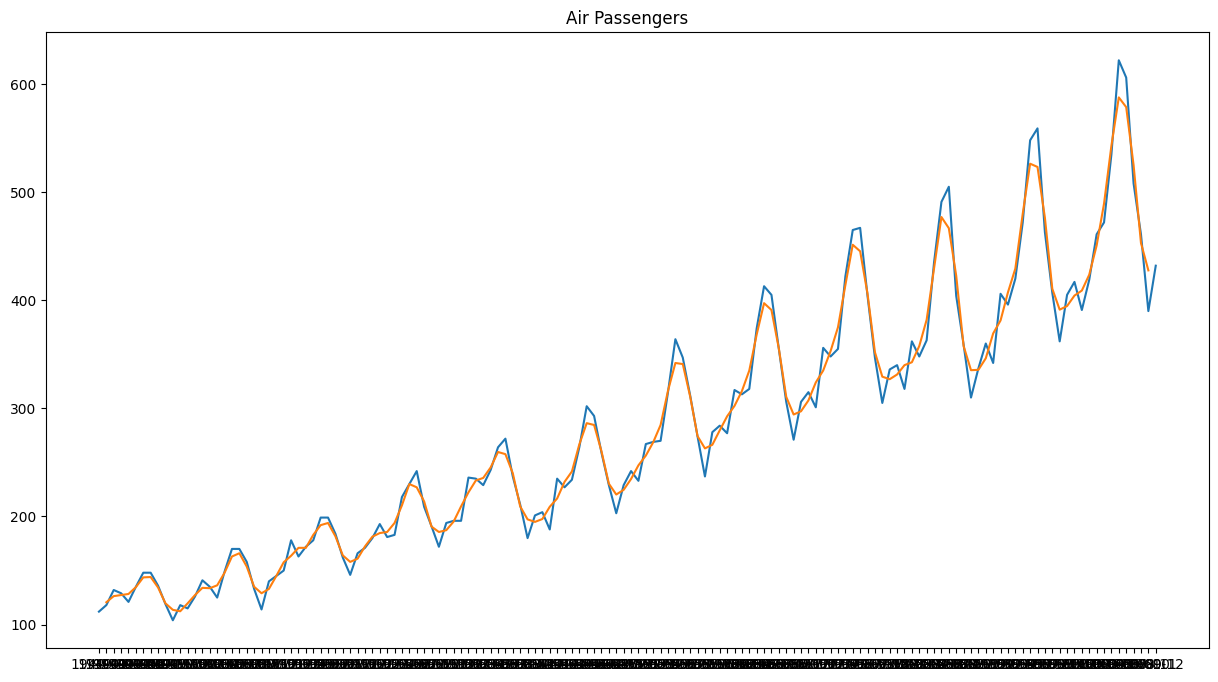

In [ ]:
span = 3
fcast = y.rolling(window=span, center = True).mean()
plt.plot(y, label = "Data")
plt.plot(fcast, label = 'Centered Rolling Mean')
plt.title('Air Passengers')
plt.show()

In [ ]:
y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (12,))

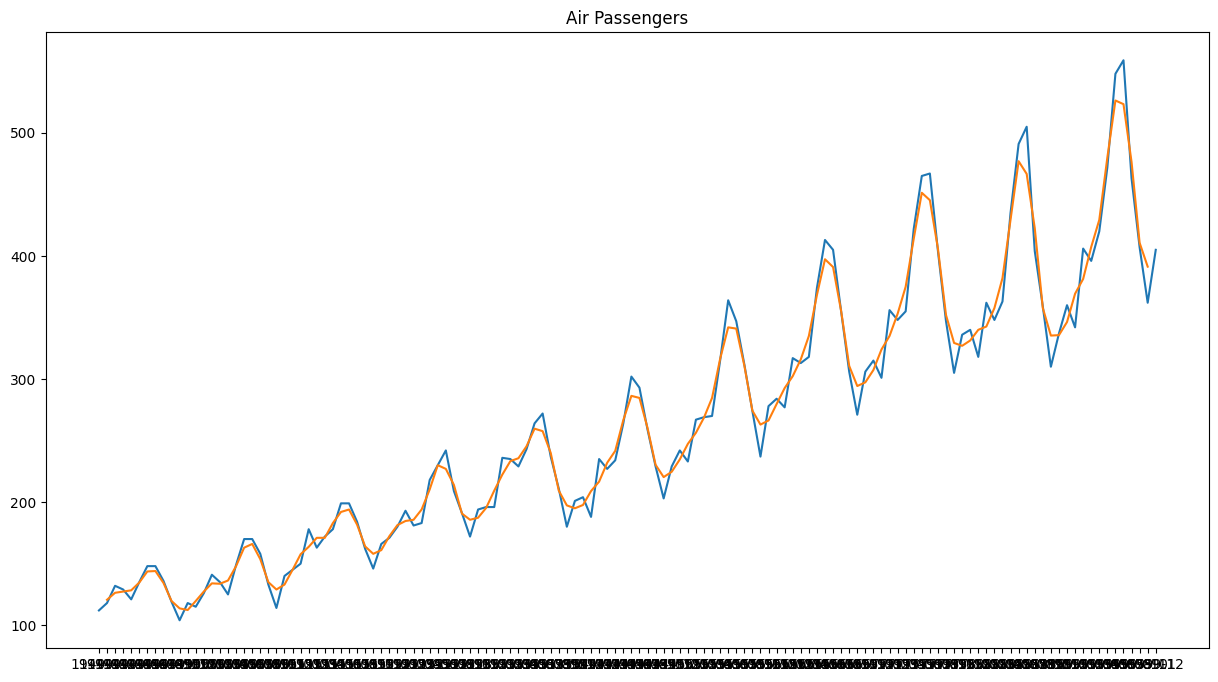

In [ ]:
span = 3
fcast = y_train.rolling(window=span, center = True).mean()
plt.plot(y_train, label = "Data")
plt.plot(fcast, label = 'Centered Rolling Mean')
plt.title('Air Passengers')
plt.show()

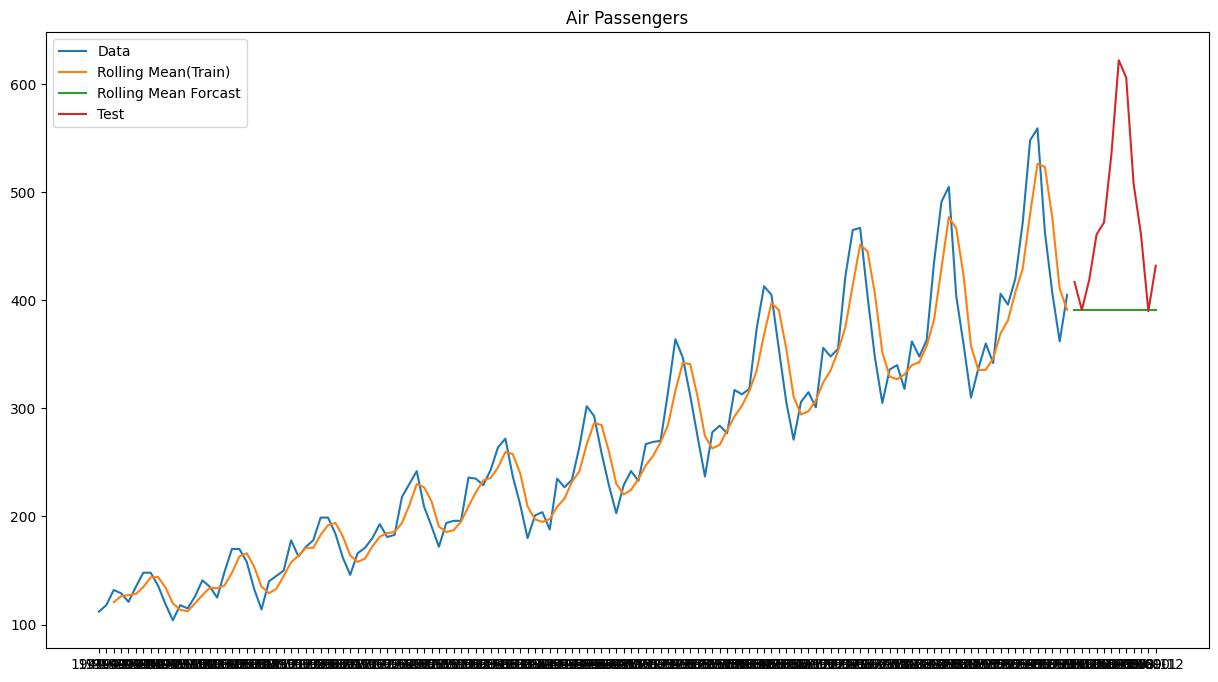

In [ ]:
span = 3
fcast = y_train.rolling(window=span, center = False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index = y_test.index)
plt.plot(y_train, label = 'Data')
plt.plot(fcast, label = 'Rolling Mean(Train)')
plt.plot(MA_fcast, label = 'Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc = 'best')
plt.show()

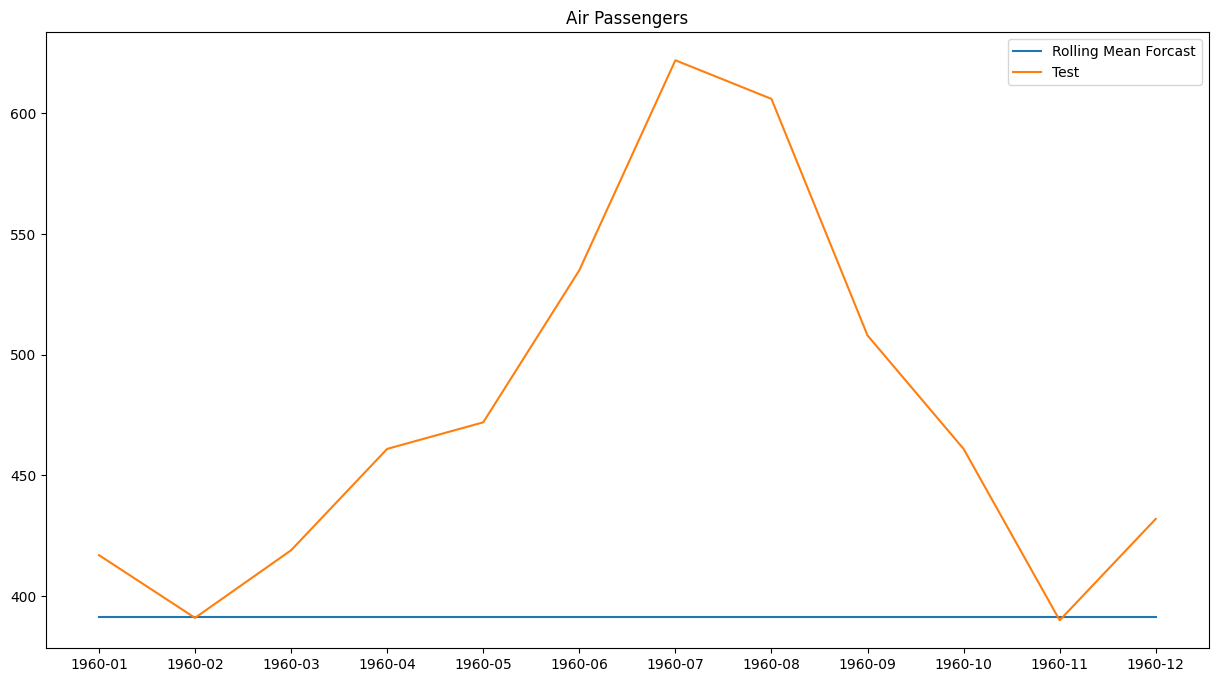

In [ ]:
plt.plot(MA_fcast, label = 'Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error
span = 3
fcast = y_train.rolling(window=span, center = False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index = y_test.index)
root_mean_squared_error(y_test, MA_fcast)

112.85462625283321

Try with different numbers of Span which gives the best RMSE value

In [ ]:
from sklearn.metrics import root_mean_squared_error
span = 7                # 7 is giving the minimum RMSE value , while the values beyond 7 is increasing
fcast = y_train.rolling(window=span, center = False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index = y_test.index)
root_mean_squared_error(y_test, MA_fcast)

76.28653914303472

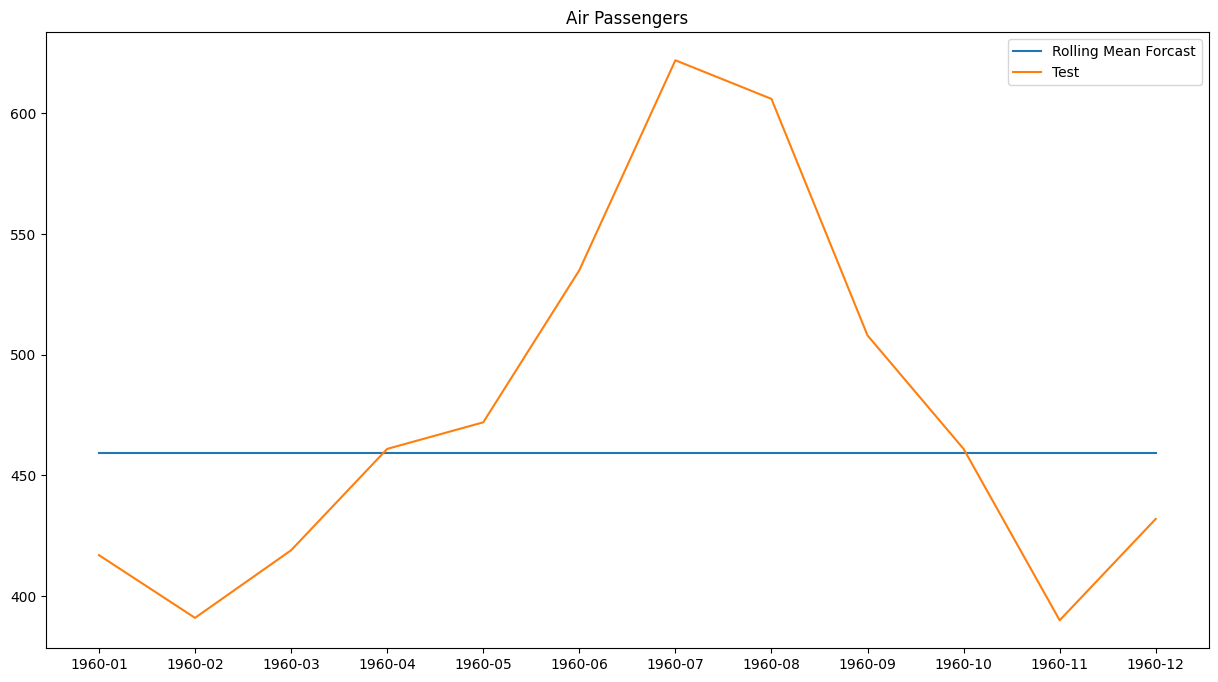

In [ ]:
plt.plot(MA_fcast, label = 'Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc = 'best')
plt.show()

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
alpha = 0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


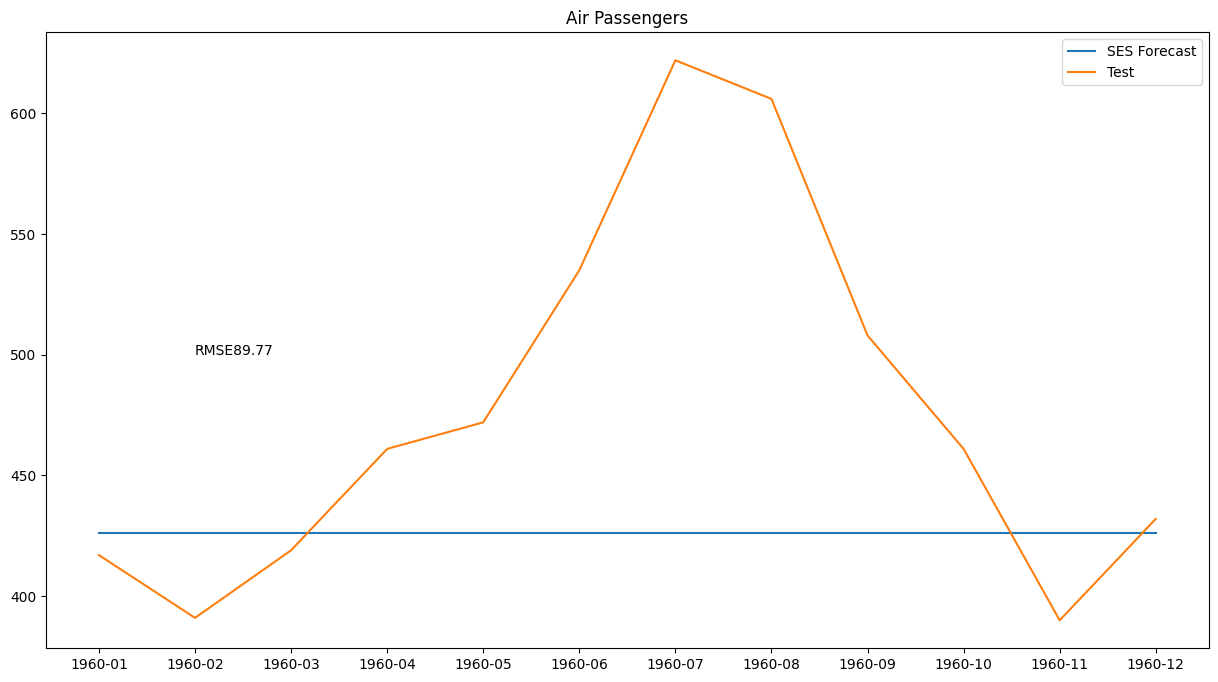

In [ ]:
ses_fcast = pd.Series(fcast1, index = y_test.index)
error = round(root_mean_squared_error(y_test, ses_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(ses_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc='best')
plt.show()

***Holt's Linear Trend***

In [ ]:
from statsmodels.tsa.api import Holt
holt = Holt(y_train)
alpha , beta = 0.2, 0.2
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


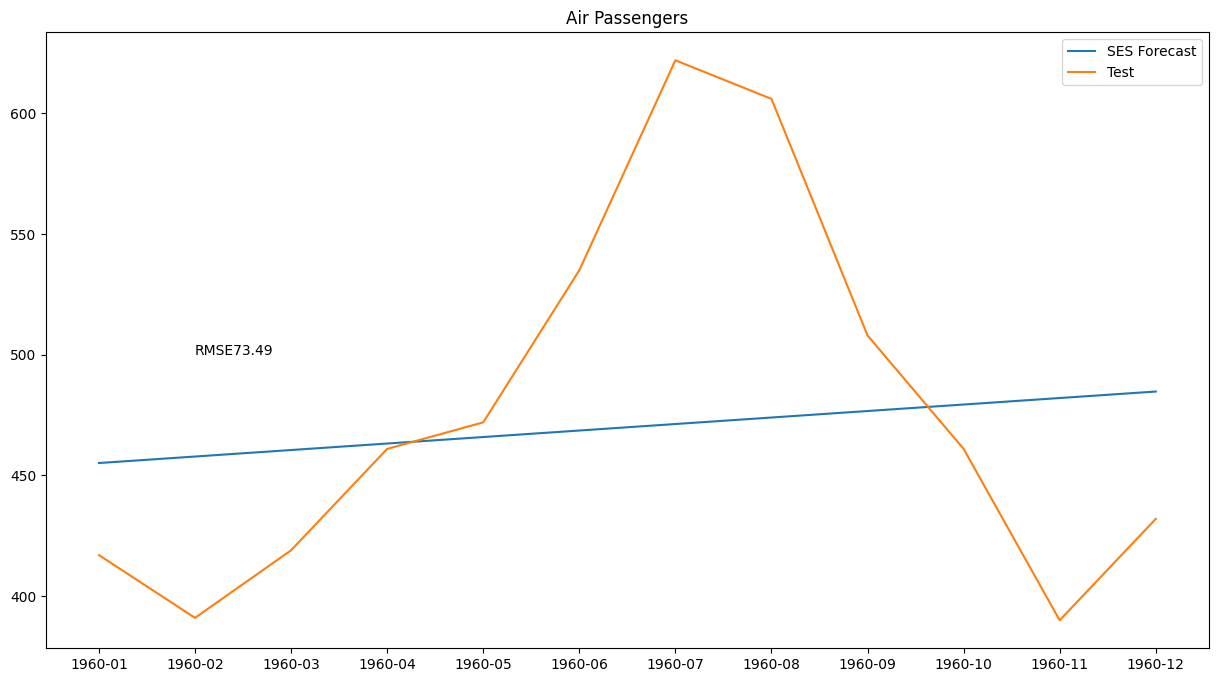

In [ ]:
holt_fcast = pd.Series(fcast1, index = y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(holt_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc='best')
plt.show()

***Holt's Exponential Trend***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


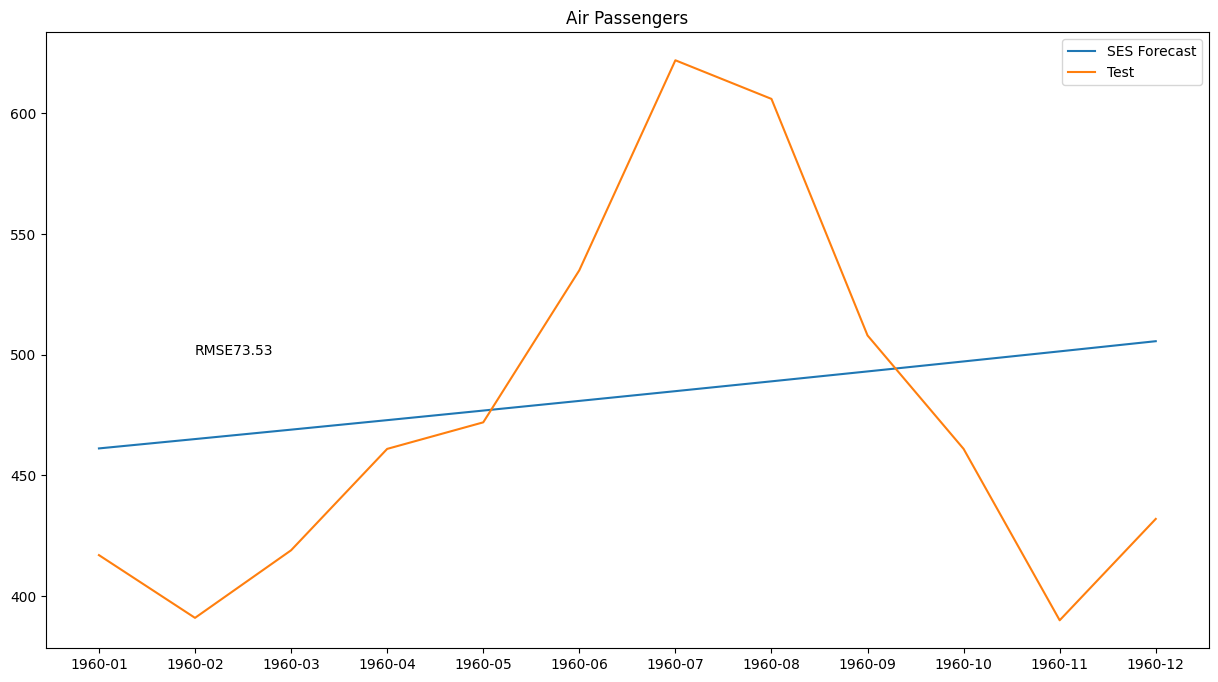

In [ ]:
from statsmodels.tsa.api import Holt
holt = Holt(y_train, exponential= True)
alpha , beta = 0.2, 0.2
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index = y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(holt_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc='best')
plt.show()

***Additive Damped Trend***

<ipython-input-89-0e51e0ec8f4b>:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  add_damp = Holt(y_train, damped = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


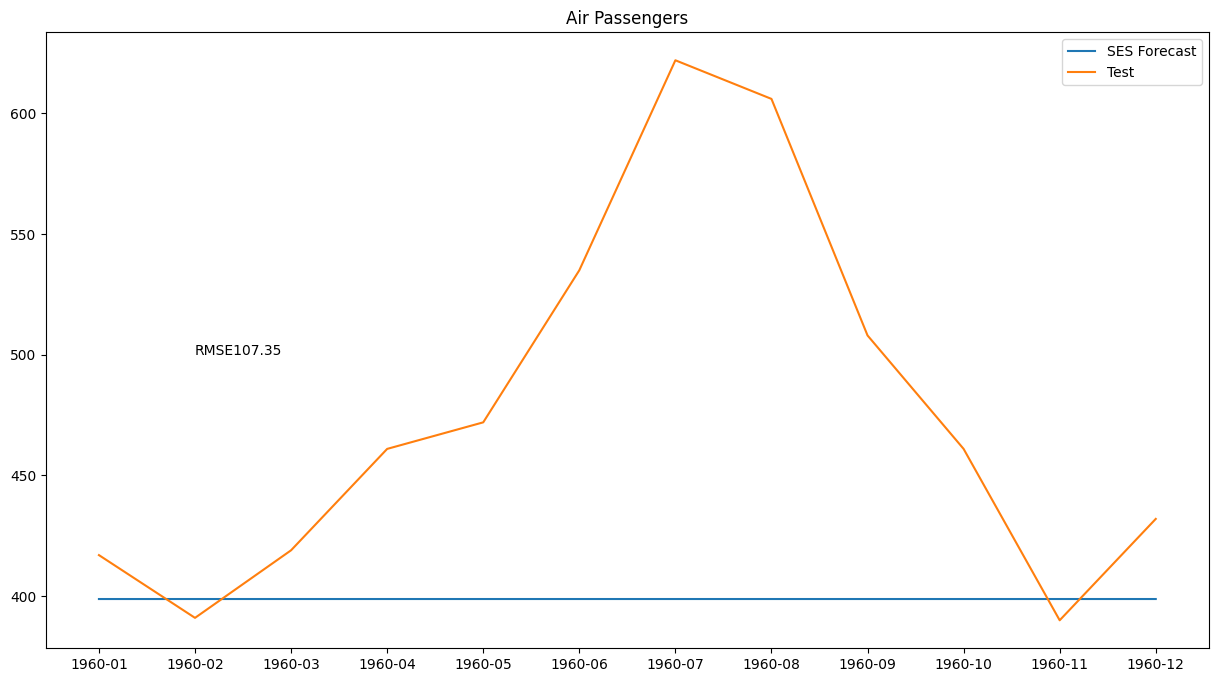

In [ ]:
alpha, beta, phi = 0.8, 0.02, 0.1
add_damp = Holt(y_train, damped = True)
fit1 = add_damp.fit(smoothing_level = alpha, smoothing_trend = beta, damping_trend = phi)
fcast1 = fit1.forecast(len(y_test))
add_damp_fcast = pd.Series(fcast1, index = y_test.index)
error = round(root_mean_squared_error(y_test, add_damp_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(add_damp_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc='best')
plt.show()

***Multiplicative Damped Trend***

<ipython-input-90-dd9892a53de1>:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  mult_damp = Holt(y_train, exponential = True, damped = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


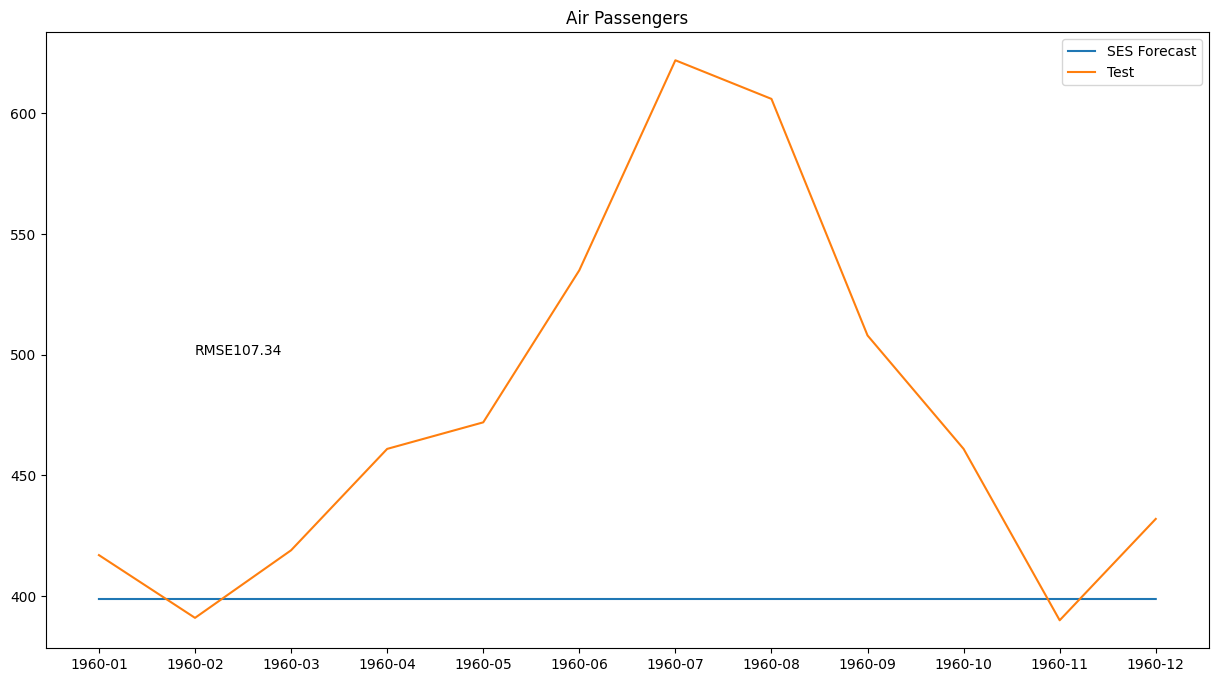

In [ ]:
alpha, beta, phi = 0.8, 0.02, 0.1
mult_damp = Holt(y_train, exponential = True, damped = True)
fit1 = mult_damp.fit(smoothing_level = alpha, smoothing_trend = beta, damping_trend = phi)
fcast1 = fit1.forecast(len(y_test))
mult_damp_fcast = pd.Series(fcast1, index = y_test.index)
error = round(root_mean_squared_error(y_test, mult_damp_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(mult_damp_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')
plt.legend(loc='best')
plt.show()

Holt - Winters Additive Trend

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Air Passengers')

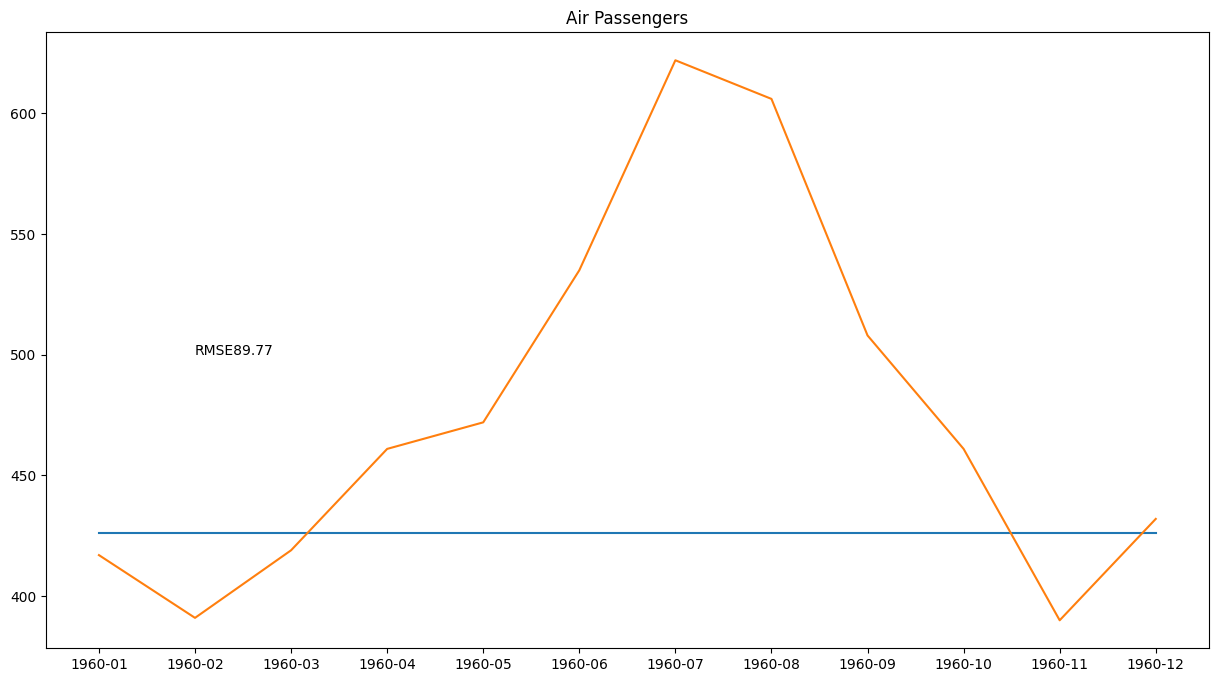

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha , beta , gamma = 0.2,0.02,0.1
hw_a = ExponentialSmoothing(y_train)
fit3 = hw_a.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_a_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Air Passengers')

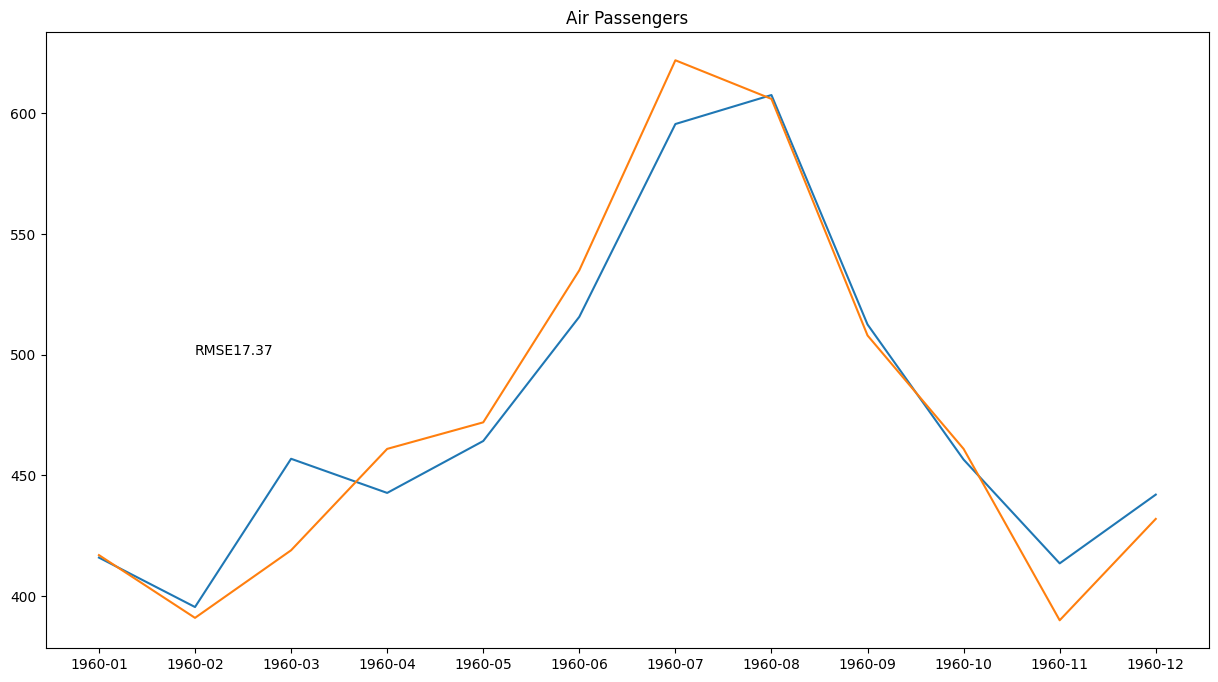

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha , beta , gamma = 0.2,0.2,0.95
hw_a = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add')
fit3 = hw_a.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_a_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')

***Auto Tunning***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Air Passengers')

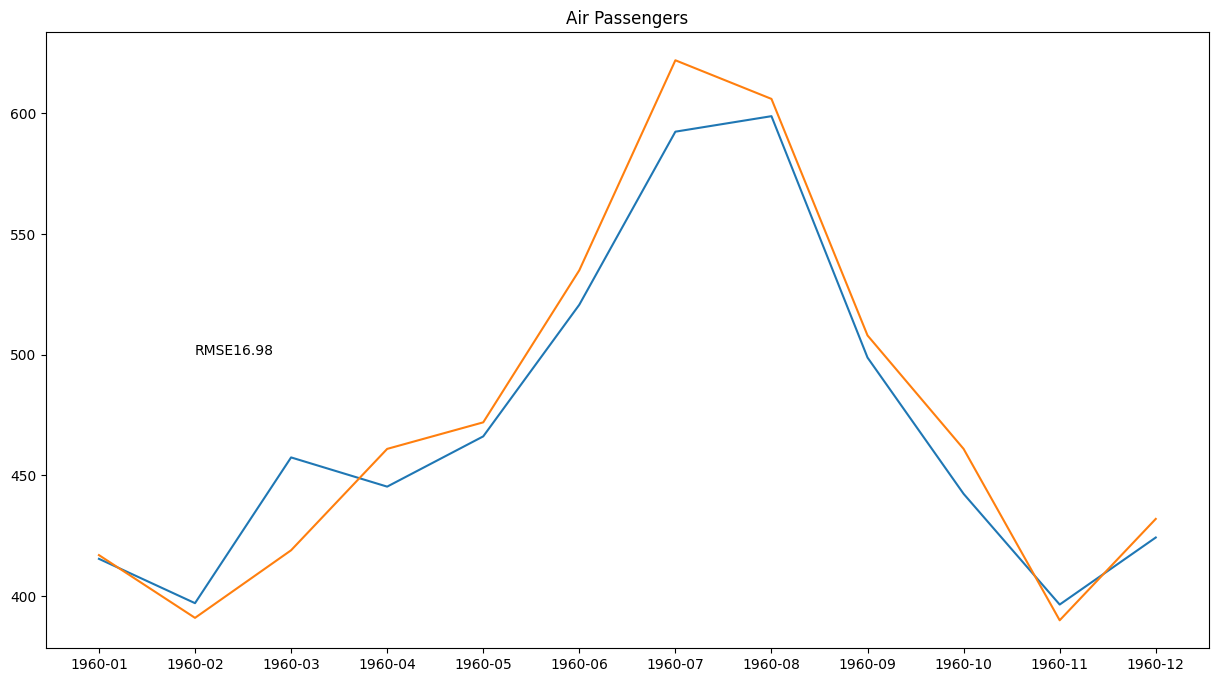

In [ ]:
# wITHOUT Alpha, Beta, Gamma
from statsmodels.tsa.api import ExponentialSmoothing
# alpha , beta , gamma = 0.2,0.2,0.95
hw_a = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add')
# fit3 = hw_a.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fit3 = hw_a.fit()
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_a_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')

In [ ]:
hw_a.params['smoothing_level'], hw_a.params['smoothing_trend'], hw_a.params['smoothing_seasonal']

(0.2511226095632821, 5.508110649082165e-10, 0.7488773877049423)

***Holt - Winter Multiplicative model***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Air Passengers')

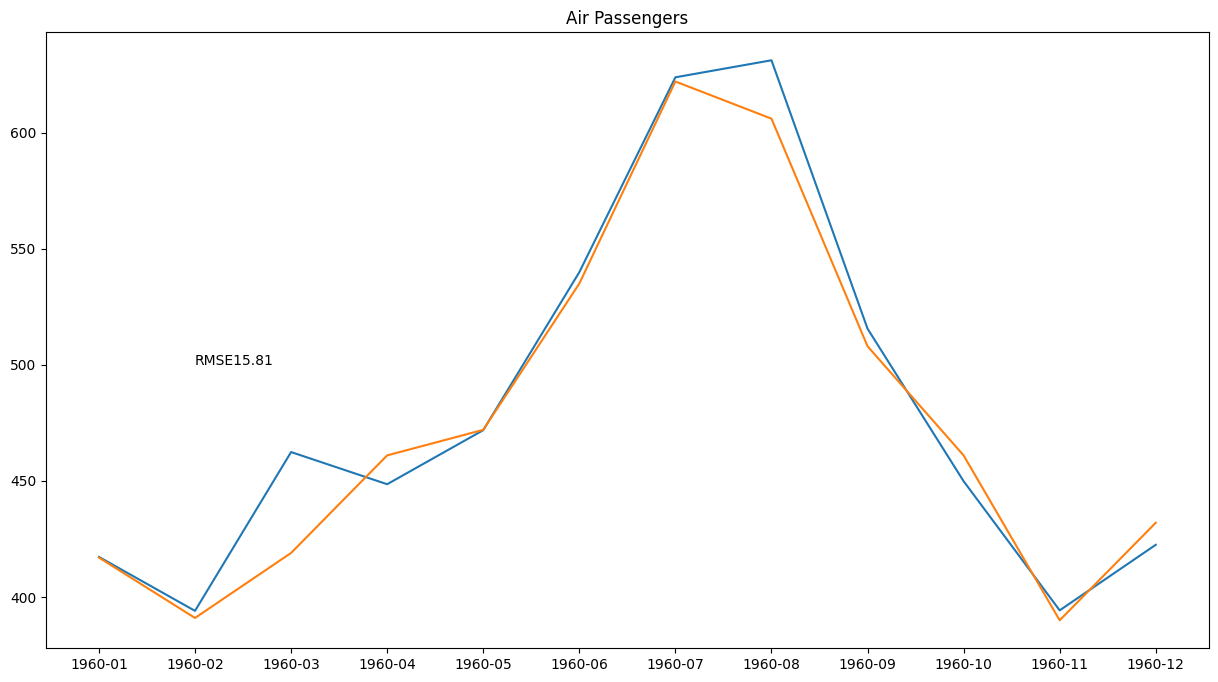

In [ ]:
# wITHOUT Alpha, Beta, Gamma
from statsmodels.tsa.api import ExponentialSmoothing
# alpha , beta , gamma = 0.2,0.2,0.95
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='mul')
# fit3 = hw_a.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_m_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')

***Damped + Holt Winter***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Air Passengers')

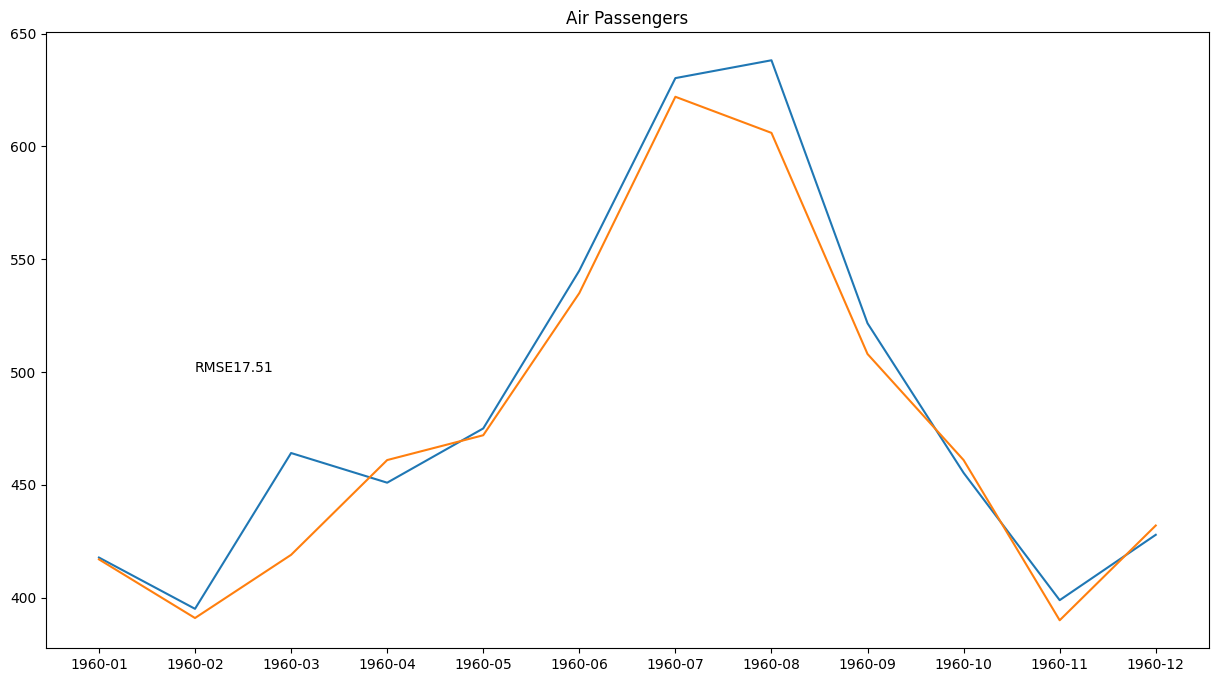

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='mul', damped_trend = True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_m_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Air Passengers')

# ***Monthly - Milk Production in pounds.csv***

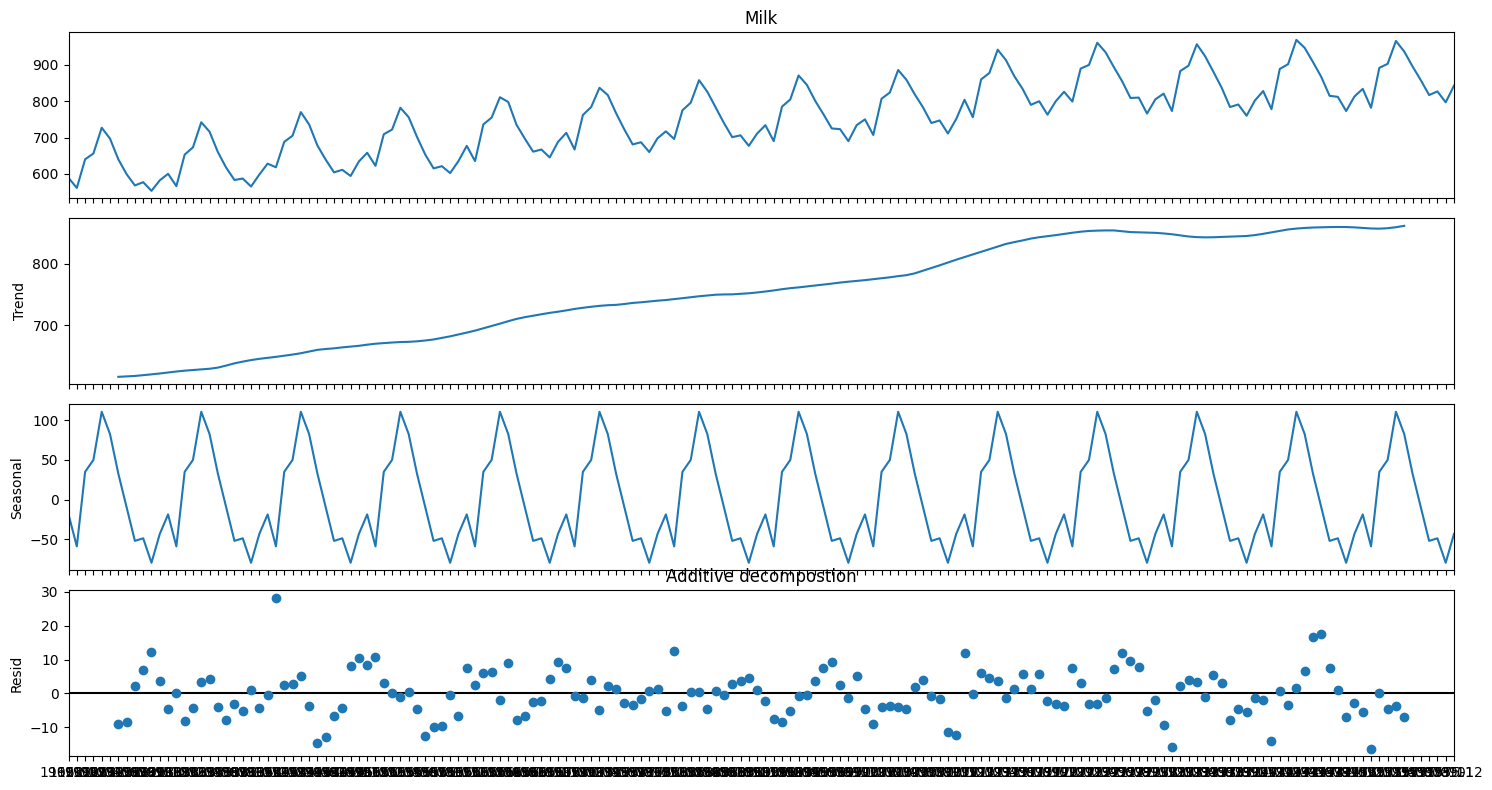

In [ ]:
milk = pd.read_csv('/content/monthly-milk-production-pounds-p.csv', index_col=0)
result = seasonal_decompose(milk['Milk'], model='additive', period = 12)
result.plot()
plt.title('Additive decompostion')
plt.show()

(168,)


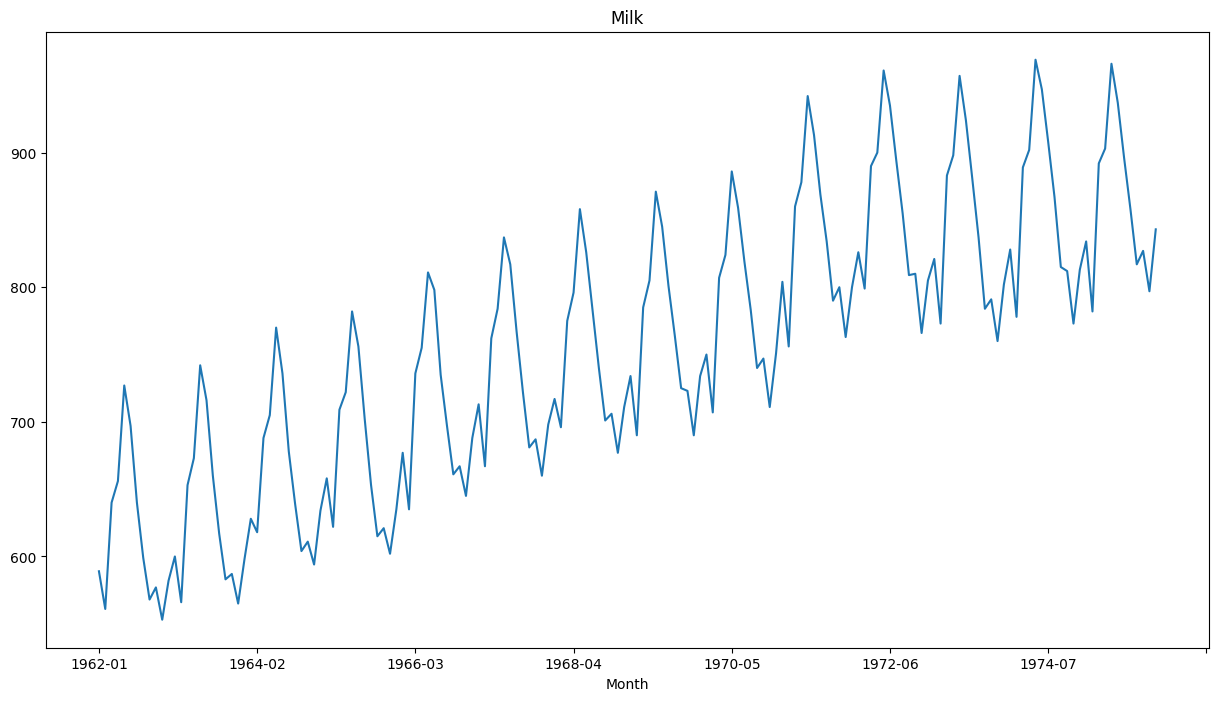

In [ ]:
y = milk['Milk']
print(y.shape)
y.plot()
plt.title('Milk')
plt.show()

In [ ]:
y_train = y[:156]
y_test = y[156:]
y_train.shape, y_test.shape

((156,), (12,))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


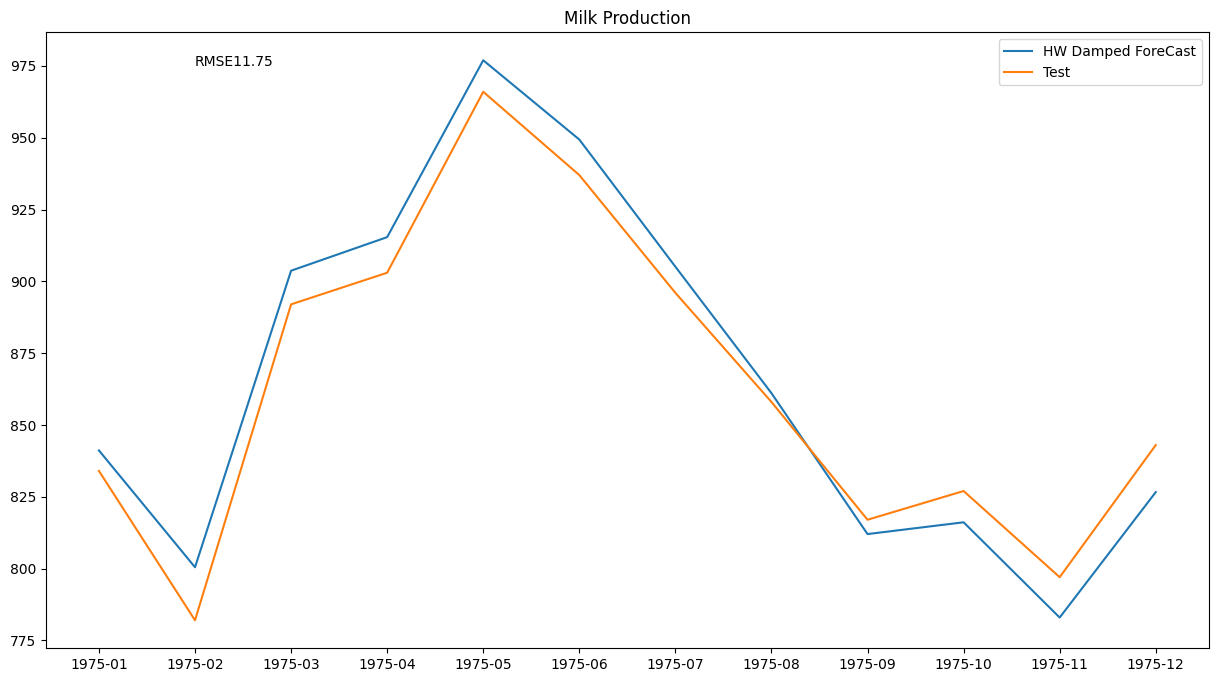

In [ ]:
# wITHOUT Alpha, Beta, Gamma
from statsmodels.tsa.api import ExponentialSmoothing
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,975,"RMSE"+str(error))
plt.plot(hw_m_fcast, label = 'HW Damped ForeCast')
plt.plot(y_test, label = 'Test')
plt.title('Milk Production')
plt.legend(loc='best')
plt.show()


***Resampling the Series as yearly***

In [ ]:
milk = pd.read_csv('/content/monthly-milk-production-pounds-p.csv', index_col=0)
y = milk['Milk']
y.index = pd.to_datetime(y.index).to_period('M')
type(y.index)

pandas.core.indexes.period.PeriodIndex

<ipython-input-135-e09e64b5fc10>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  y_yearly = y.resample('Y').sum()


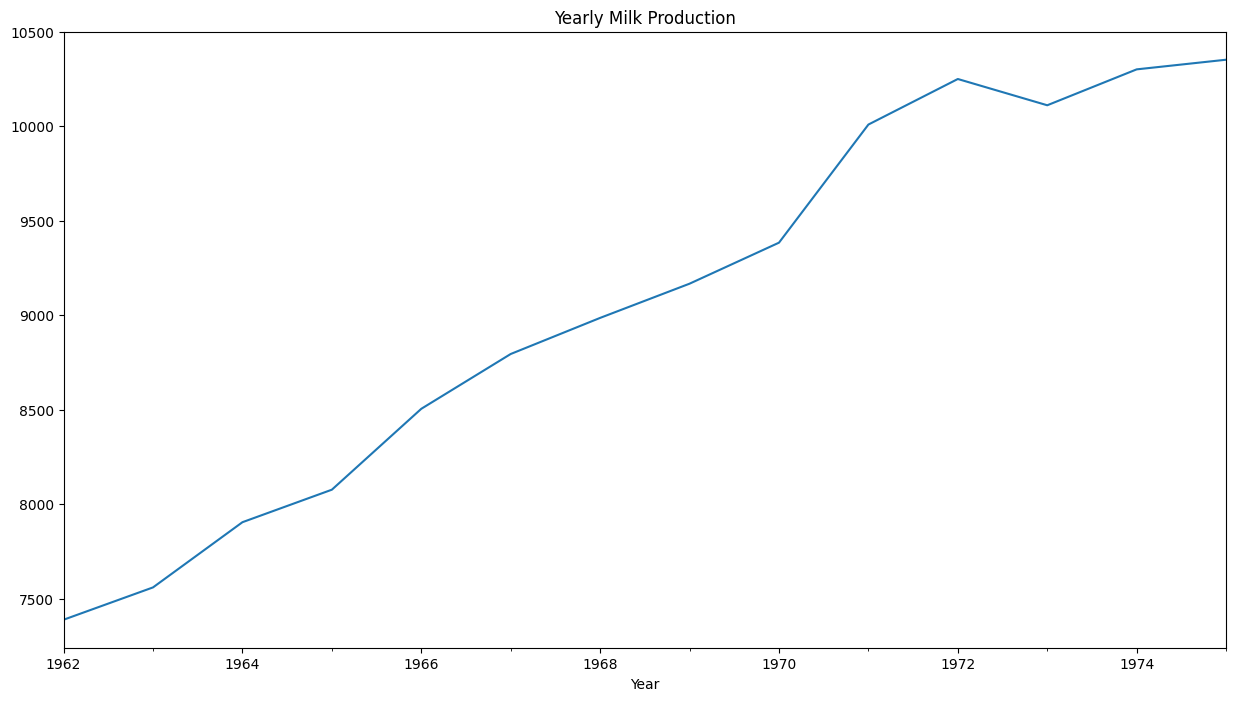

In [ ]:
y_yearly = y.resample('Y').sum()
y_yearly.index.rename('Year', inplace =True)
y_yearly.plot()
plt.title('Yearly Milk Production')
plt.show()

In [ ]:
y_train = y_yearly[:-3]
y_test = y_yearly[-3:]  # Using last three years for training

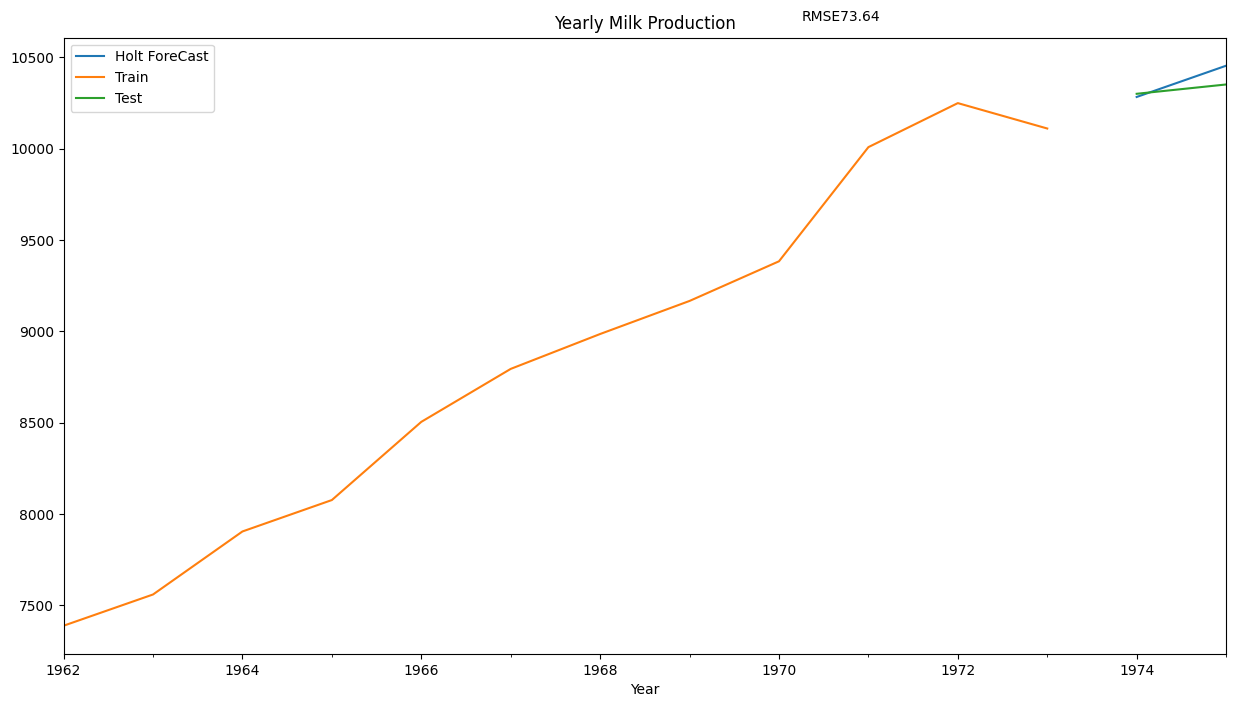

In [ ]:
holt = Holt(y_train)
# alpha , beta = 0.2, 0.4
# fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index = y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.plot(label = 'Holt ForeCast')
y_train.plot(label = 'Train')
y_test.plot(label = 'Test')
plt.text(0.25,10700,"RMSE"+str(error))
plt.title('Yearly Milk Production')
plt.legend(loc='best')
plt.show()

***Beer Dataset***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

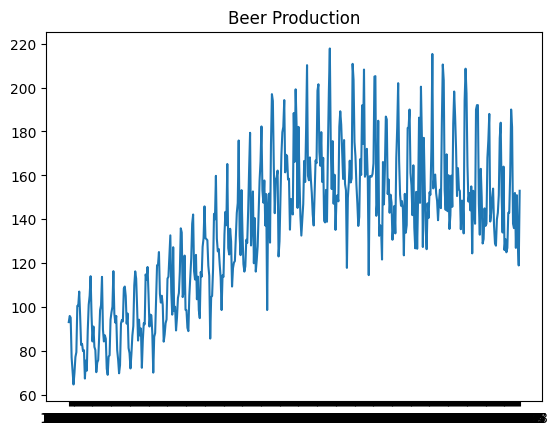

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
beer = pd.read_csv('/content/monthly-beer-production-in-austr.csv', index_col=0)
plt.plot(beer)
plt.title('Beer Production')
plt.show()

In [ ]:
y = beer['Monthly beer production']
y.shape
y_train = y[:452]
y_test = y[452:]   # using only last 24 months as the test data
y_train.shape, y_test.shape

((452,), (24,))

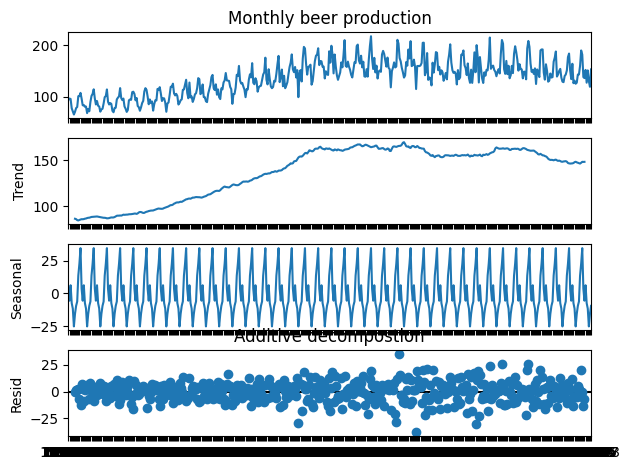

In [ ]:
result = seasonal_decompose(beer['Monthly beer production'], model='additive', period = 12)
result.plot()
plt.title('Additive decompostion')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


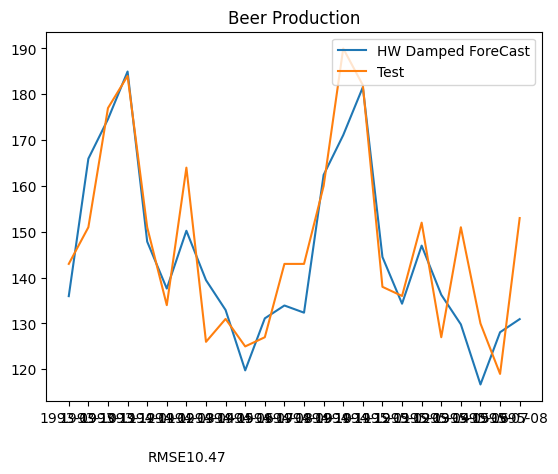

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index = y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(4,100,"RMSE"+str(error))
plt.plot(hw_m_fcast,label = 'HW Damped ForeCast')
plt.plot(y_test, label = 'Test')
plt.title('Beer Production')
plt.legend(loc='best')
plt.show()



# **14/11/2024**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
milk = pd.read_csv('/content/monthly-milk-production-pounds-p.csv', index_col=0)
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y, maxlag = 10)
print("P_value = ", result[1])
if result[1] < 0.05:
    print("Time Series is Stationary")
else :
    print("Time Series is not Stationary")

P_value =  0.6443832606930124
Time Series is not Stationary


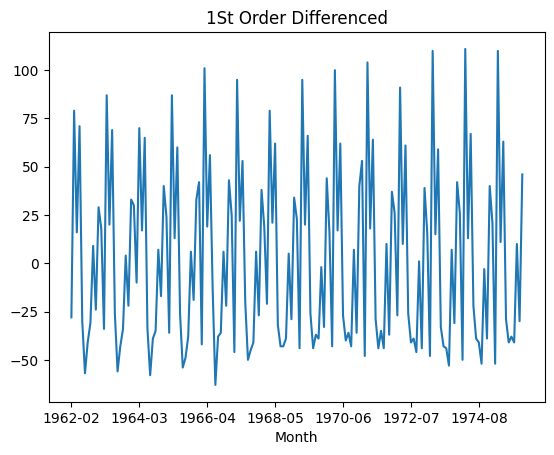

In [ ]:
import matplotlib.pyplot as plt
y.diff()[1:].plot()
plt.title('1St Order Differenced')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

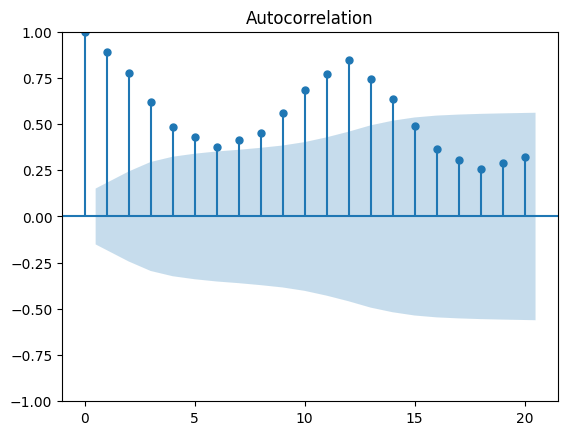

In [ ]:
plot_acf(y, lags = 20, alpha = 0.05)
plt.show()

**Coal Consumption Dataset**

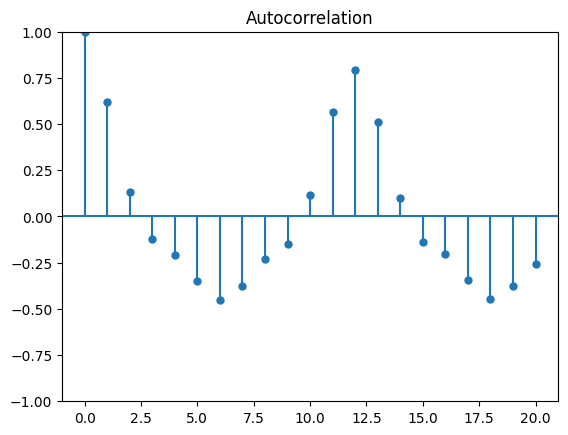

In [ ]:
coal = pd.read_csv('/content/Coal Consumption.csv', index_col = 0 )
plot_acf(coal['Amount'], lags = 20, alpha = None)
plt.show()

***AR Model***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [ ]:
model = ARIMA(y_train, order = (1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Milk   No. Observations:                  156
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -812.415
Date:                Thu, 14 Nov 2024   AIC                           1630.830
Time:                        05:59:31   BIC                           1639.980
Sample:                    01-01-1962   HQIC                          1634.547
                         - 12-01-1974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        741.6234     37.047     20.019      0.000     669.013     814.234
ar.L1          0.9006      0.041     22.031      0.000       0.820       0.981
sigma2      1933.7240    293.647      6.585      0.0

In [ ]:
y_train.shape

(156,)

In [ ]:
y_pred = model_fit.predict(start = len(y_train), end =len(y_train)+ len(y_test)-1)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

98.7542893279049

In [ ]:
y_test.index = y_pred.index

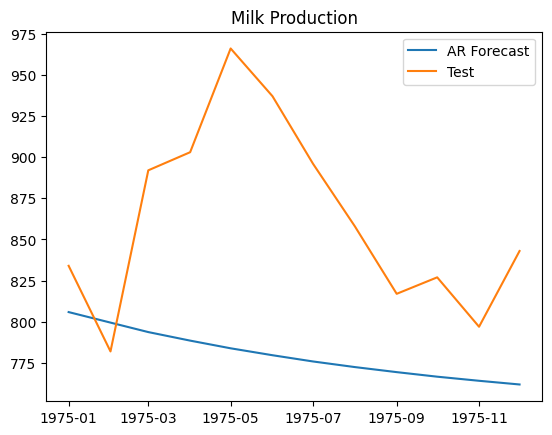

In [ ]:
plt.plot(y_pred, label = 'AR Forecast')
plt.plot(y_test, label = 'Test')
plt.title('Milk Production')
plt.legend(loc='best')
plt.show()

In [ ]:
y.shape

(168,)

In [ ]:
y_train = y[:156]
y_test = y[156:]
y_train.shape, y_test.shape

((156,), (12,))

In [ ]:
model = ARIMA(y_train, order = (24,2,4), freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end =len(y_train)+ len(y_test)-1)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

9.76412619115924

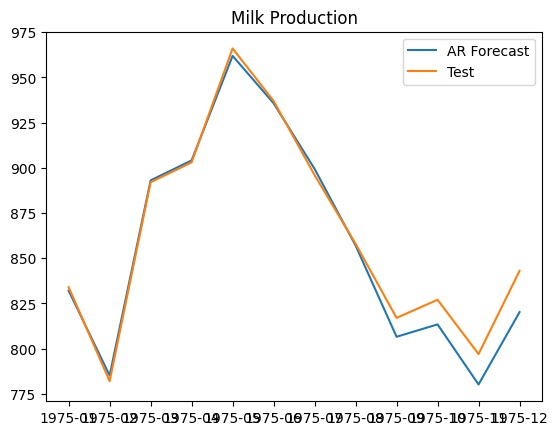

In [ ]:
plt.plot(y_test.index,y_pred, label = 'AR Forecast')
plt.plot(y_test.index,y_test.values, label = 'Test')
plt.title('Milk Production')
plt.legend(loc='best')
plt.show()

**MA Model**

In [ ]:
model = ARIMA(y_train, order = (0,0,1))
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end =len(y_train)+ len(y_test)-1)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

126.20472470584032

**SARIMA**

In [ ]:
model = ARIMA(y_train, order = (3,1,1), freq = 'MS', seasonal_order = (1,1,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end =len(y_train)+ len(y_test)-1)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

10.584516054686862

# **15/11/2024**

In [ ]:
import pandas as pd

In [ ]:
milk = pd.read_csv('/content/milk.csv', index_col=0)
milk

water  protein   fat  lactose   ash
Animal                                         
HORSE        90.1      2.6   1.0      6.9  0.35
ORANGUTAN    88.5      1.4   3.5      6.0  0.24
MONKEY       88.4      2.2   2.7      6.4  0.18
DONKEY       90.3      1.7   1.4      6.2  0.40
HIPPO        90.4      0.6   4.5      4.4  0.10
CAMEL        87.7      3.5   3.4      4.8  0.71
BISON        86.9      4.8   1.7      5.7  0.90
BUFFALO      82.1      5.9   7.9      4.7  0.78
GUINEA PIG   81.9      7.4   7.2      2.7  0.85
CAT          81.6     10.1   6.3      4.4  0.75
FOX          81.6      6.6   5.9      4.9  0.93
LLAMA        86.5      3.9   3.2      5.6  0.80
MULE         90.0      2.0   1.8      5.5  0.47
PIG          82.8      7.1   5.1      3.7  1.10
ZEBRA        86.2      3.0   4.8      5.3  0.70
SHEEP        82.0      5.6   6.4      4.7  0.91
DOG          76.3      9.3   9.5      3.0  1.20
ELEPHANT     70.7      3.6  17.6      5.6  0.63
RABBIT       71.3     12.3  13.1      1.9  2.30
RAT          72.5      9.2  12.6      3.3  1.40
DEER         65.9     10.4  19.7      2.6  1.40
REINDEER     64.8     10.7  20.3      2.5  1.40
WHALE        64.8     11.1  21.2      1.6  1.70
SEAL         46.4      9.7  42.0      0.0  0.85
DOLPHIN      44.9     10.6  34.9      0.9  0.53

In [ ]:
!pip install scipy

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().set_output(transform = 'pandas')
milk_scaled = scaler.fit_transform(milk)


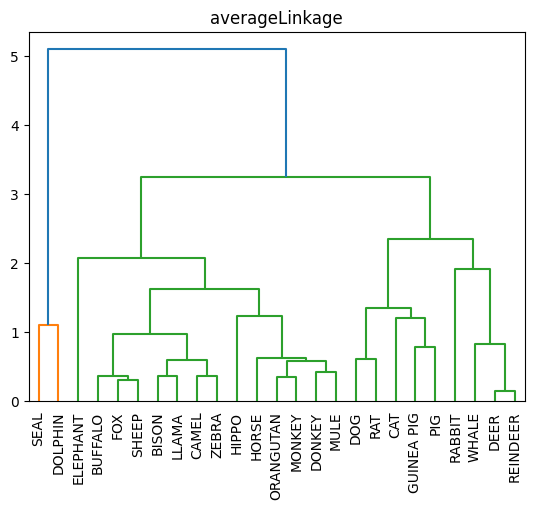

In [ ]:
link = 'average'
mergings = linkage(milk_scaled, method = link)
dendrogram(mergings, labels=list(milk_scaled.index))
plt.title(link+'Linkage')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
clust = AgglomerativeClustering(n_clusters= 3, linkage = 'average')
clust.fit(milk_scaled)
clust.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 1, 1])

In [ ]:
milk_scaled.index

Index(['HORSE', 'ORANGUTAN', 'MONKEY', 'DONKEY', 'HIPPO', 'CAMEL', 'BISON',
       'BUFFALO', 'GUINEA PIG', 'CAT', 'FOX', 'LLAMA', 'MULE', 'PIG', 'ZEBRA',
       'SHEEP', 'DOG', 'ELEPHANT', 'RABBIT', 'RAT', 'DEER', 'REINDEER',
       'WHALE', 'SEAL', 'DOLPHIN'],
      dtype='object', name='Animal')

In [ ]:
df_clust = pd.DataFrame({'Animal':list(milk_scaled.index), 'cluster':list(clust.labels_)} )
df_clust.sort_values('cluster')
silhouette_score(milk_scaled, clust.labels_)

0.48757649189546187

**Evaluate Silhouete score for diffrent no of cluster**

In [ ]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
  clust = AgglomerativeClustering(n_clusters=i, linkage='average')
  clust.fit(milk_scaled)
  scores.append(silhouette_score(milk_scaled, clust.labels_))

print(scores)
i_max = scores.index(max(scores))
print('Best no of cluster: ' , n_clust[i_max])

[0.5186847578981009, 0.48757649189546187, 0.41601538367376095, 0.3830100222472541, 0.37428423003570394]
Best no of cluster:  2


***Handling Us Arrest Dataset***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
us = pd.read_csv('/content/USArrests.csv', index_col = 0)
us.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [ ]:
scaler = StandardScaler().set_output(transform='pandas')
us_scaled = scaler.fit_transform(us)

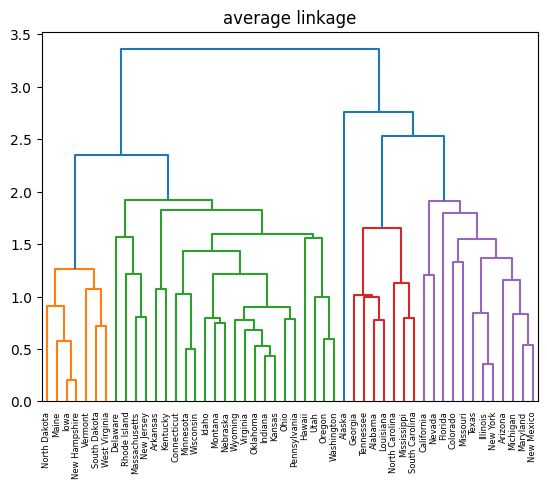

In [ ]:
link = 'average'
mergings = linkage(us_scaled, method=link)
dendrogram(mergings, labels=list(us_scaled.index))
plt.title(link +' linkage')
plt.xticks(rotation=90, fontsize=6)
plt.show()

*Evaluate Silhouete score for diffrent no of cluster and finding best no. cluster according to Silhouete score*

Bigger the Sil score better the classification

In [ ]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
  clust = AgglomerativeClustering(n_clusters=i, linkage='average')
  clust.fit(us_scaled)
  scores.append(silhouette_score(us_scaled, clust.labels_))

print(scores)
i_max = scores.index(max(scores))
print('Best no of cluster: ' , n_clust[i_max])

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323, 0.2719787783719339]
Best no of cluster:  2


In [ ]:
df_clust = pd.DataFrame({'state': list(us_scaled.index), 'cluster': list(clust.labels_)})


df_clust.sort_values('cluster')

state  cluster
24        Missouri        0
19        Maryland        0
27          Nevada        0
30      New Mexico        0
31        New York        0
12        Illinois        0
8          Florida        0
21        Michigan        0
5         Colorado        0
4       California        0
2          Arizona        0
42           Texas        0
43            Utah        1
37    Pennsylvania        1
48       Wisconsin        1
35        Oklahoma        1
34            Ohio        1
45        Virginia        1
26        Nebraska        1
25         Montana        1
46      Washington        1
36          Oregon        1
49         Wyoming        1
10          Hawaii        1
3         Arkansas        1
6      Connecticut        1
16        Kentucky        1
15          Kansas        1
13         Indiana        1
11           Idaho        1
22       Minnesota        1
20   Massachusetts        2
7         Delaware        2
29      New Jersey        2
38    Rhode Island        2
41       Tennessee        3
39  South Carolina        3
23     Mississippi        3
32  North Carolina        3
17       Louisiana        3
9          Georgia        3
0          Alabama        3
33    North Dakota        4
40    South Dakota        4
14            Iowa        4
28   New Hampshire        4
44         Vermont        4
18           Maine        4
47   West Virginia        4
1           Alaska        5

# **DBSCAN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [ ]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(milk_scaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            cnt = cnt + 1
            milk_scaled['Clust'] = clust_DB.labels_
            milk_scl_inliers = milk_scaled[milk_scaled['Clust']!=-1]   # we want to perform sil only in inliers data ( not in outliers data )
            sil_sc = silhouette_score(milk_scl_inliers.iloc[:,:-1],   # to not get last column -1
                             milk_scl_inliers.iloc[:,-1])
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)

a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]



0.4 2 0.6518937593821538
0.4 3 0.5385180352469559
0.6 2 0.5934459505692155
0.6 3 0.5344431042454363
0.6 4 0.5519747727201489
1 2 0.4344818095328392
1 3 0.6473871775367226
Best Paramters:


Sr  eps  min_pt       sil
0  1.0  0.4     2.0  0.651894

**DBSCAN with best params**

In [ ]:
clust_DB = DBSCAN(eps = 0.4, min_samples=2)
clust_DB.fit(milk_scaled)
print(clust_DB.labels_)
print(len(set(clust_DB.labels_)))

[-1  0  0 -1 -1  1  1  2 -1 -1  2  1 -1 -1  1  2 -1 -1 -1 -1  3  3 -1 -1
 -1]
5


In [ ]:
df_clust = pd.DataFrame({'state': list(milk_scaled.index), 'cluster': list(clust_DB.labels_)})
df_clust.sort_values('cluster')

state  cluster
0        HORSE       -1
22       WHALE       -1
19         RAT       -1
18      RABBIT       -1
17    ELEPHANT       -1
16         DOG       -1
13         PIG       -1
23        SEAL       -1
9          CAT       -1
12        MULE       -1
4        HIPPO       -1
3       DONKEY       -1
8   GUINEA PIG       -1
24     DOLPHIN       -1
2       MONKEY        0
1    ORANGUTAN        0
11       LLAMA        1
6        BISON        1
14       ZEBRA        1
5        CAMEL        1
10         FOX        2
7      BUFFALO        2
15       SHEEP        2
20        DEER        3
21    REINDEER        3

In [ ]:
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]

Best Paramters:


Sr  eps  min_pt       sil
0  1.0  0.4     2.0  0.651894

**Doing DBSCAN in US Arrest dataset**

In [ ]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(us_scaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            cnt = cnt + 1
            us_scaled['Clust'] = clust_DB.labels_
            milk_scl_inliers = us_scaled[us_scaled['Clust']!=-1]
            sil_sc = silhouette_score(milk_scl_inliers.iloc[:,:-1],
                             milk_scl_inliers.iloc[:,-1])
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)

a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]


0.4 2 0.9294801120696734
0.6 2 0.4598846166598499
0.6 3 0.7189015458613475
1 2 0.11526083405519487
1 3 0.11526083405519487
1 4 0.21075699219922683
1 5 0.22417529426027302
Best Paramters:


Sr  eps  min_pt      sil
0  1.0  0.4     2.0  0.92948

In [ ]:
culst_DB = DBSCAN(eps=0.4, min_samples=2)
culst_DB.fit(us_scaled.iloc[:,:5])

DBSCAN(eps=0.4, min_samples=2)

In [ ]:
us_clust = us.copy()
us_clust['cluster'] = culst_DB.labels_
us_clust = us_clust[us_clust['cluster']!=-1]
us_clust.groupby('cluster').mean()

Murder  Assault  UrbanPop   Rape
cluster                                  
0         10.75    251.5      84.5  25.05
1          2.15     56.5      56.5  10.40

In [ ]:
us_clust.sort_values('cluster')

Murder  Assault  UrbanPop  Rape  cluster
Illinois         10.4      249        83  24.0        0
New York         11.1      254        86  26.1        0
Iowa              2.2       56        57  11.3        1
New Hampshire     2.1       57        56   9.5        1

**Nutrient Dastaset**

In [ ]:
nutrient = pd.read_csv('/content/nutrient.csv', index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
nutrient_scaled = scaler.fit_transform(nutrient)

In [ ]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(nutrient_scaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            cnt = cnt + 1
            nutrient_scaled['Clust'] = clust_DB.labels_
            nutri_scl_inliers = nutrient_scaled[nutrient_scaled['Clust']!=-1]
            sil_sc = silhouette_score(nutri_scl_inliers.iloc[:,:-1],
                             nutri_scl_inliers.iloc[:,-1])
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)

a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]


0.2 2 0.5710837307456915
0.4 2 0.9040570858308878
0.6 2 0.7752441663222646
1 2 0.43236957939711584
1 3 0.43147150560271585
Best Paramters:


Sr  eps  min_pt       sil
1  2.0  0.4     2.0  0.904057

In [ ]:
culst_DB = DBSCAN(eps=0.4, min_samples=2)
culst_DB.fit(nutrient_scaled.iloc[:,:5])

DBSCAN(eps=0.4, min_samples=2)

In [ ]:
nutri_clust = nutrient.copy()
nutri_clust['cluster'] = culst_DB.labels_
nutri_clust = nutri_clust[nutri_clust['cluster']!=-1]
nutri_clust.groupby('cluster').mean()

energy  protein   fat  calcium  iron
cluster                                      
0         350.0     19.4  29.4      9.0  2.52
1         170.0     25.0   7.0      9.5  1.35

In [ ]:
nutri_clust.sort_values('cluster')

energy  protein  fat  calcium  iron  cluster
Food_Item                                                   
BEEF BRAISED       340       20   28        9   2.6        0
BEEF STEAK         375       19   32        9   2.6        0
SMOKED HAM         340       20   28        9   2.5        0
PORK ROAST         340       19   29        9   2.5        0
PORK SIMMERED      355       19   30        9   2.4        0
CHICKEN CANNED     170       25    7       12   1.5        1
TUNA CANNED        170       25    7        7   1.2        1

# **K Means Clustring**

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
milk = pd.read_csv('/content/milk.csv', index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)
clust = KMeans(n_clusters=3)
clust.fit(milk_scaled)
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 1], dtype=int32)

In [ ]:
silhouette_score(milk_scaled, clust.labels_)

0.5391595072079529

In [ ]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
  clust = KMeans(n_clusters=i)
  clust.fit(milk_scaled)
  scores.append(silhouette_score(milk_scaled, clust.labels_))

print(scores)
i_max = scores.index(max(scores))
print('Best no of cluster: ' , n_clust[i_max])


[0.5258508931703421, 0.48757649189546187, 0.4355891993570169, 0.44252077257870376, 0.386462010908779]
Best no of cluster:  2


**Recency DataCustomer Dataset**

In [ ]:
import pandas as pd

In [ ]:
sales = pd.read_csv('/content/rfm_data_customer.csv', index_col =0)
sales.columns

Index(['revenue', 'most_recent_visit', 'number_of_orders', 'recency_days'], dtype='object')

In [ ]:
sales_new = sales.drop('most_recent_visit', axis=1)
scaler = StandardScaler().set_output(transform='pandas')
sales_scaled = scaler.fit_transform(sales_new)
clust = KMeans(n_clusters=3)
clust.fit(sales_scaled)
clust.labels_

array([2, 1, 2, ..., 2, 2, 1], dtype=int32)

In [ ]:
silhouette_score(sales_scaled, clust.labels_)

0.37043108569460437

In [ ]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
  clust = KMeans(n_clusters=i)
  clust.fit(sales_scaled)
  scores.append(silhouette_score(sales_scaled, clust.labels_))

print(scores)
i_max = scores.index(max(scores))
print('Best no of cluster: ' , n_clust[i_max])

[0.3618891075356095, 0.3709819629631691, 0.3226992273843249, 0.3253035962112069, 0.28804219618255883]
Best no of cluster:  3


In [ ]:
sales_clust = sales_new.copy()
sales_clust['cluster'] = clust.labels_
sales_clust.groupby('cluster').mean()

revenue  number_of_orders  recency_days
cluster                                             
0         989.114362         10.065446    347.275854
1        1153.796194         11.844326    117.577988
2        1552.662713         15.242614    122.906893
3         551.652212          6.043655    460.673166
4         544.898801          6.277128    162.442527
5         838.048945          9.101392    119.004056